<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN240_DataScience_671/blob/main/Visualization_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3: Visualization Basic with Plotnine

Materials from: https://ds100.org/sp24/, https://r4ds.hadley.nz/, https://rafalab.dfci.harvard.edu/dsbook-part-1/dataviz/ggplot2.html

## slido

## Data Science Life Cycle: Visualization

![data_science_life_cycle_visualization.png](https://drive.google.com/uc?export=view&id=1p3n-_Hmbr3x0kobqMRoNfEtKtgiZ-dzk)

## Goals of Visualization

1. To **help your own understanding** of your data/results.
 - Key part of exploratory data analysis.
 - Summarize trends visually before in-depth analysis.
 - Lightweight, iterative and flexible.

2. To **communicate** results/conclusions to others.
 - Highly editorial and selective.
 - Be thoughtful and careful!
 - Fine-tuned to achieve a communications goal.
 - Considerations: clarity, accessibility, eye-catching, and necessary context.


## Many Visualization Tools and Libraries

- Python: [Matploltlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/), [Plotnine](https://plotnine.org/), [Plotly](https://plotly.com/python/) (for interactive plots)
- Others: [D3.js](https://d3js.org/), Excel and [Power BI](https://www.microsoft.com/en-us/power-platform/products/power-bi), [Tableau](https://www.tableau.com/), [Google Charts](https://developers.google.com/chart), [Datawrapper](https://www.datawrapper.de/), many more.
- This class: matploltlib (briefly) and plotnine (main)

## $\texttt{Matplotlib}$

- Most $\texttt{Matplotlib}$ plotting functions follow the same structure:
  - Pass in a sequence (list, array, or Series) of values to be plotted on the x-axis,
  - and a second sequence of values to be plotted on the y-axis.
- **Syntax**:
```python
import matplotlib.pyplot as plt
plt.plotting_function(x_values, y_values)
```

- To add labels and a tilte
```python
plt.xlabel("x axis label")
plt.ylabel("y axis label")
plt.title("Title of the plot")
```

### Penguin Dataset

![penguin.png](https://thumbs.dreamstime.com/z/body-parts-penguin-scheme-children-cute-animals-anatomy-english-kids-learning-words-209835974.jpg)

In [2]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load our penguin data (don't forget to upload it on colab)
# Link to the data: https://github.com/mcnakhaee/palmerpenguins/blob/master/palmerpenguins/data/penguins.csv
penguins = pd.read_csv('/content/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Creating bar plots: $\texttt{Matplotlib}$
- `plt.bar(x_values, y_values)`
- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

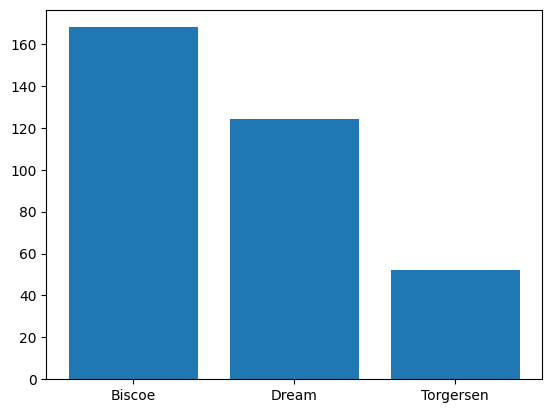

In [8]:
islands = penguins["island"].value_counts()
plt.bar(islands.index, islands.values);

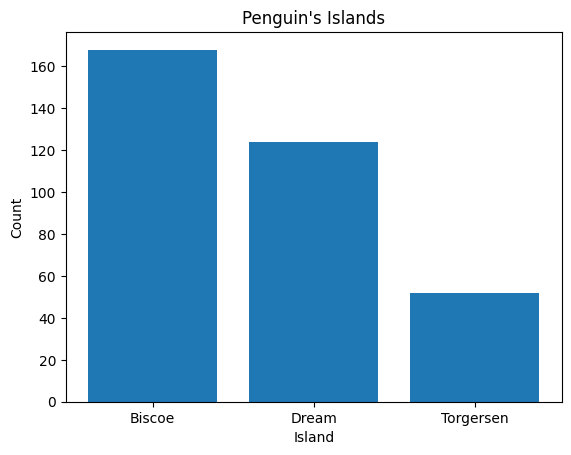

In [13]:
# Adding labels and title
islands = penguins["island"].value_counts()
plt.bar(islands.index, islands.values);
plt.xlabel('Island')
plt.ylabel('Count')
plt.title("Penguin's Islands");

- pandas buil-in plot: .plot(kind='bar')

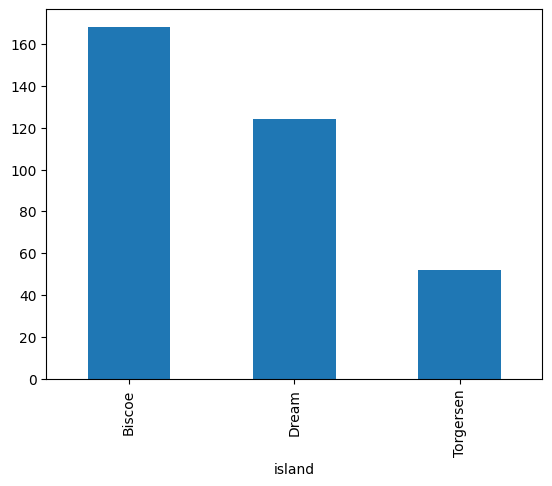

In [11]:
# pandas buil-in plot: .plot(kind='bar')
penguins['island'].value_counts().plot(kind='bar');

### Creating scatter plots: $\texttt{Matplotlib}$
- `plt.scatter()`
- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

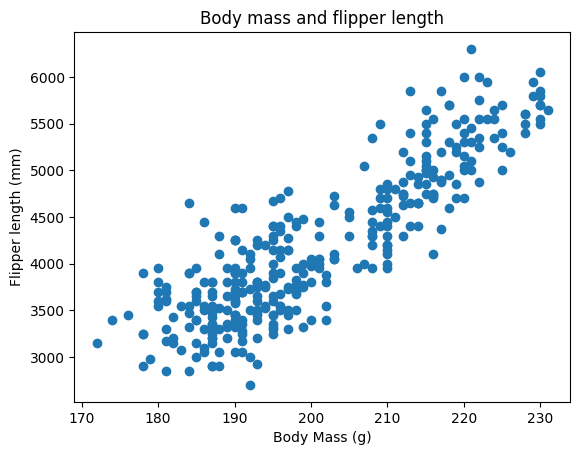

In [17]:
plt.scatter(x = penguins['flipper_length_mm'], y = penguins['body_mass_g']);
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper length (mm)')
plt.title('Body mass and flipper length');

## $\texttt{Plotnine}$ library

- https://plotnine.org/
- Based on `ggplot2` R library and Leland Wilkinson's book *The Grammar of Graphics*.
- Check out their gallary for reference: https://plotnine.org/gallery/
- Built on $\texttt{Matplotlib}$
- Already preinstalled in Google colab.
- To install: `pip install plotnine`

![plotnine](https://drive.google.com/uc?export=view&id=1VW0QoYXO8FTbqhYlTEsM_ACIvdr-5sdL)

![grammar_of_graphics](https://drive.google.com/uc?export=view&id=1LRDSi-lt_tmjDWy0FZ5ftniwGQL5v6O1)

- image ref: https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149

## Creating a ggplot

- you begin a plot with the function `ggplot()`, defining a plot object that you then add **layers** to.

In [41]:
from plotnine import *

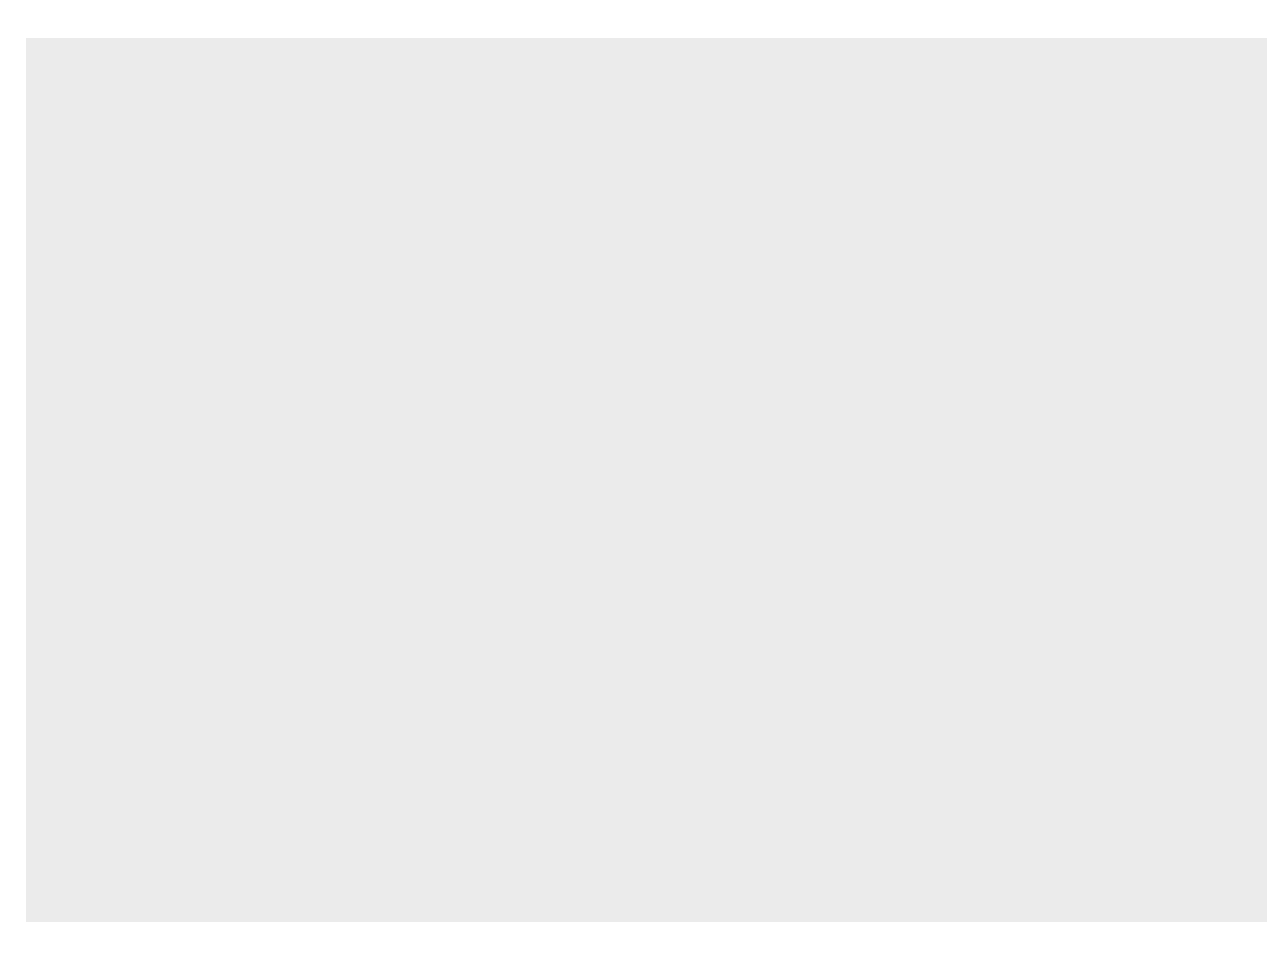

<Figure Size: (640 x 480)>

In [22]:
ggplot(data = penguins)  # Don't need plotnine.ggplot

- Next, we need to tell `ggplot()` how the information from our data will be visually represented.
-  The mapping argument is always defined in the `aes()` function, and the `x` and `y` arguments of `aes()` specify which variables to map to the `x` and `y` axes.

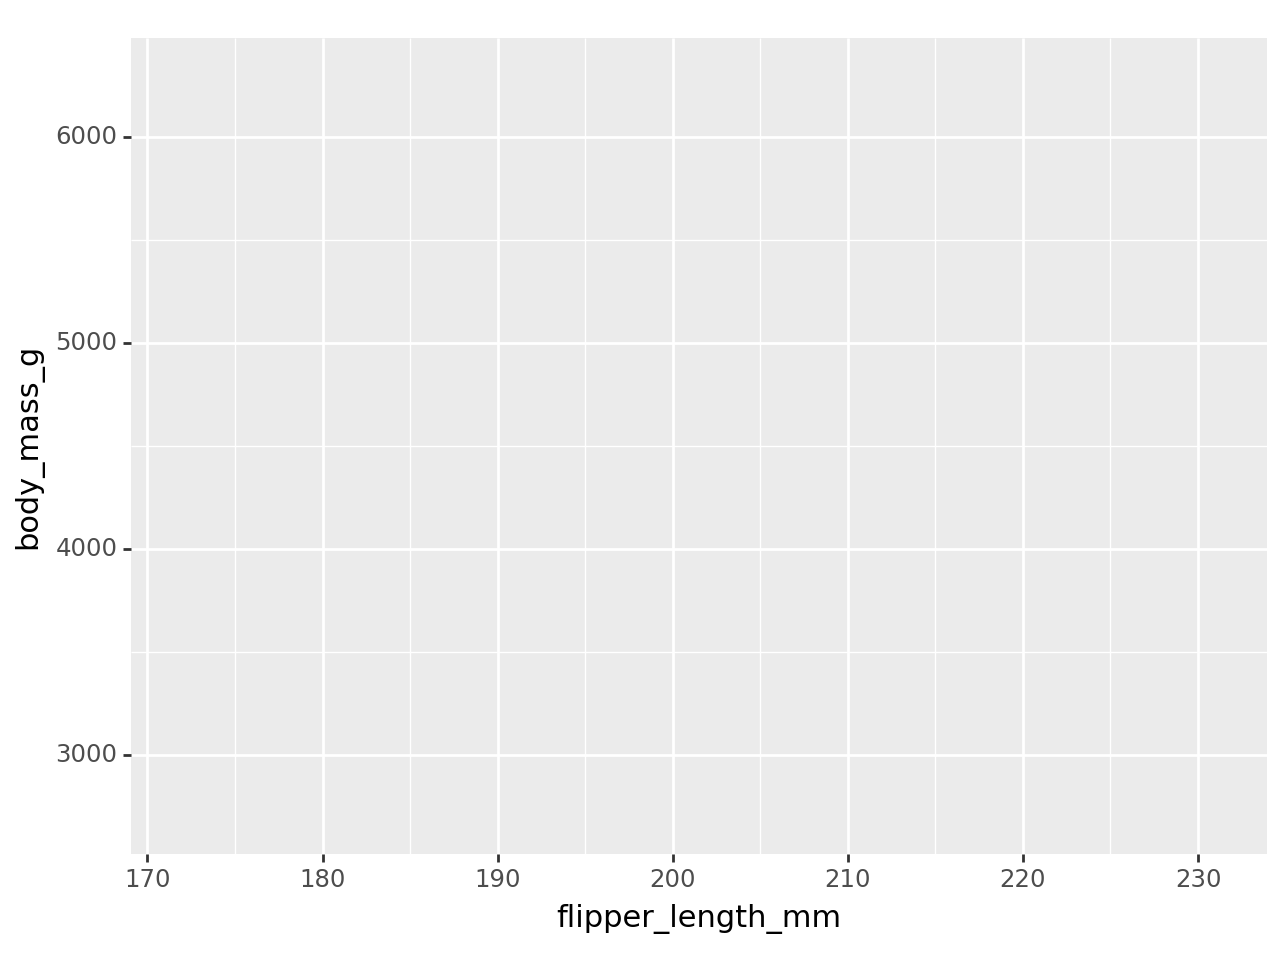

<Figure Size: (640 x 480)>

In [27]:
# For now we are going to map x = flipper_length, y = body_mass
ggplot(
  data = penguins,
  mapping = aes(x = "flipper_length_mm", y = "body_mass_g")
)

- Next, we want to plot *points* on our empty canvas.
- We need to define a **geom**: the geometrical object that a plot uses to represent data. These functions start with `geom_`.
- `geom_point()` add a layer of points to your plot, which creates a scatterplot.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


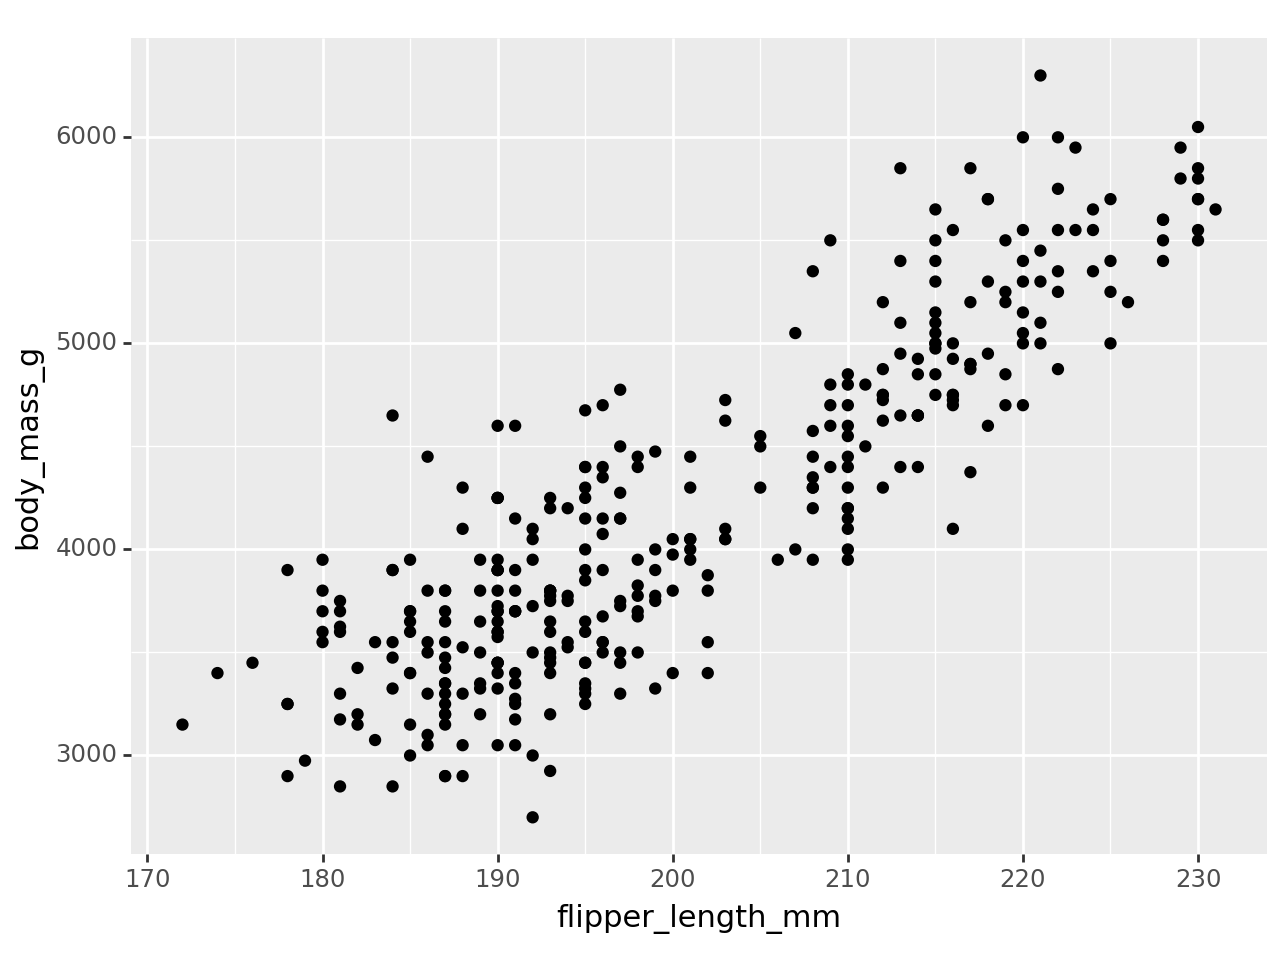

<Figure Size: (640 x 480)>

In [31]:
(
  ggplot(data = penguins, mapping = aes(x = "flipper_length_mm", y = "body_mass_g")) +
  geom_point()
)

### Warning
- `PlotnineWarning: geom_point : Removed 2 rows containing missing values.`
- `plotnine` will warn you about removing missing values (`NaN`)
- This is a good idea.
- We will talk about missing values later. For now, we will suprress the warning.

In [44]:
# This will ignore ALL warnings. Not a good idea in general.
import warnings
warnings.filterwarnings('ignore')

## Plotting the Flipper and Body Mass across Species

- Scatterplots are useful for displaying the relationship between two numerical variables.
- Species may play a key role in this relationship.
- Want to add species information into the plot  
  - Represent species with different **colored points**
  - Color is in the aesthetic

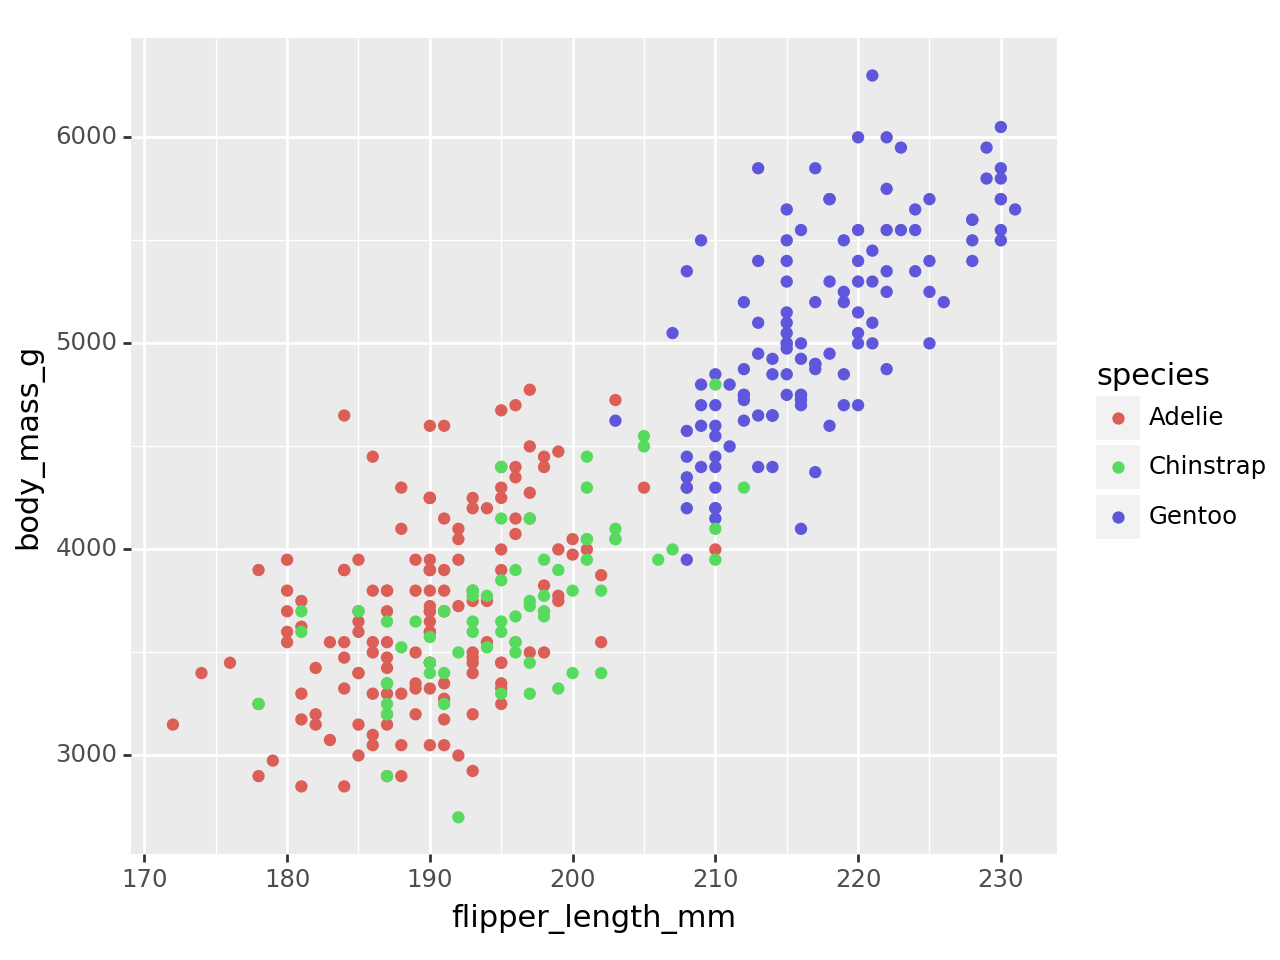

In [51]:
(
  ggplot(
      data = penguins,
      mapping = aes(x = "flipper_length_mm", y = "body_mass_g", color = "species")
      ) +
  geom_point()
).draw()  # Adding draw() remove Figure Size

- When a **categorical variable** is mapped to an **aesthetic**, ggplot2 will automatically assign a unique value of the aesthetic (here a unique color) to each unique level of the variable (each of the three species), a process known as **scaling**

## Plotting the relationship between Flipper and Body Mass across Species

- Adding lines to indicate the linear relationship between Flipper and Body Mass (more on this in the second half)
- Lines are a new geometric object -> Need new `geom_`
- `plotnine` has a geometric object that draw the best fit lines, calls, `geom_smooth()`
  - `method = "lm"` to get a best fit linear line.

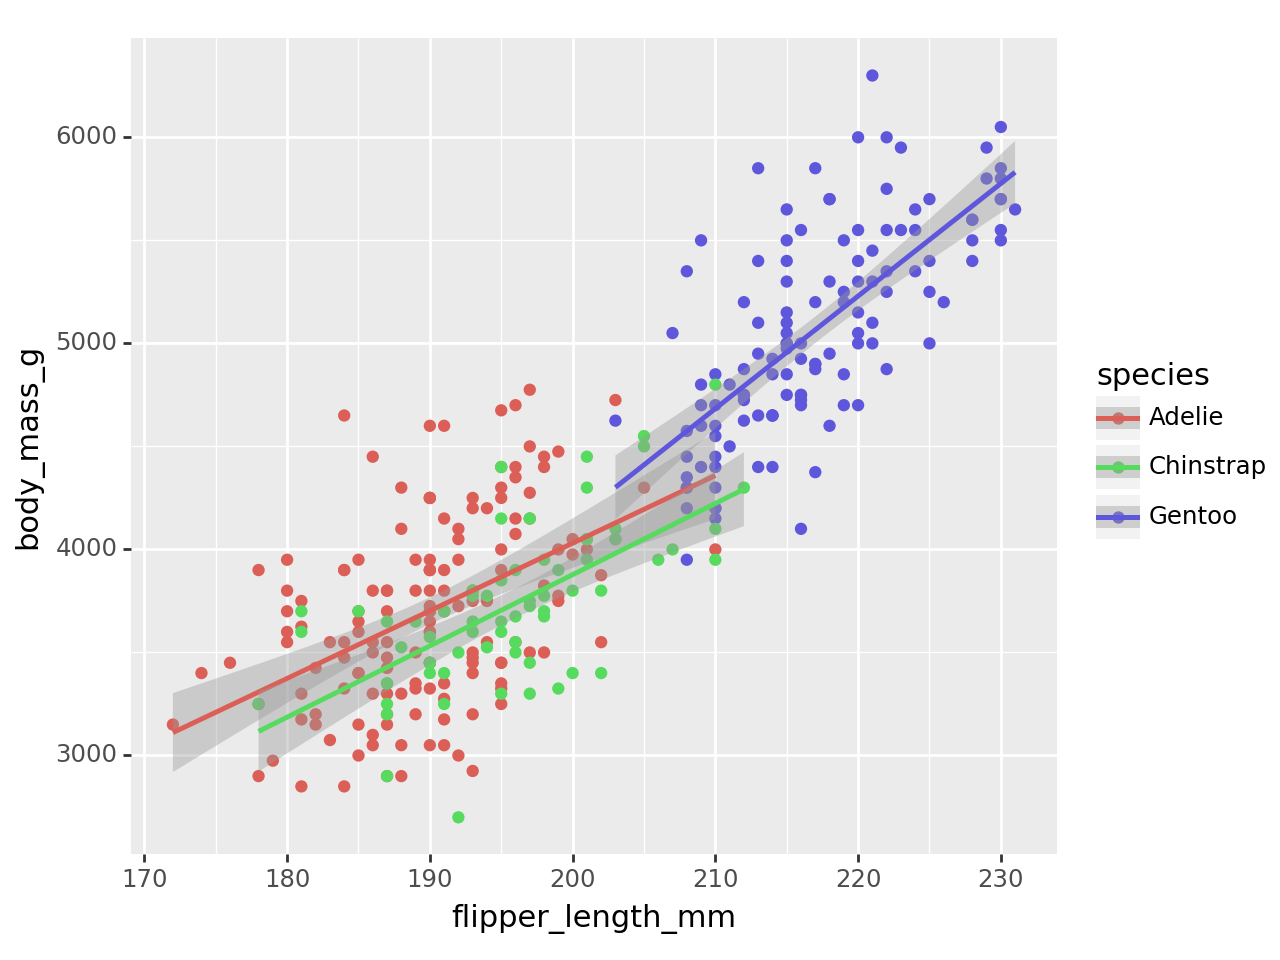

In [52]:
(
  ggplot(
      data = penguins,
      mapping = aes(x = "flipper_length_mm", y = "body_mass_g", color = "species")
      ) +
  geom_point() +
  geom_smooth(method = "lm")
).draw()

- You can store the plot in a variable and keep adding layers to it.

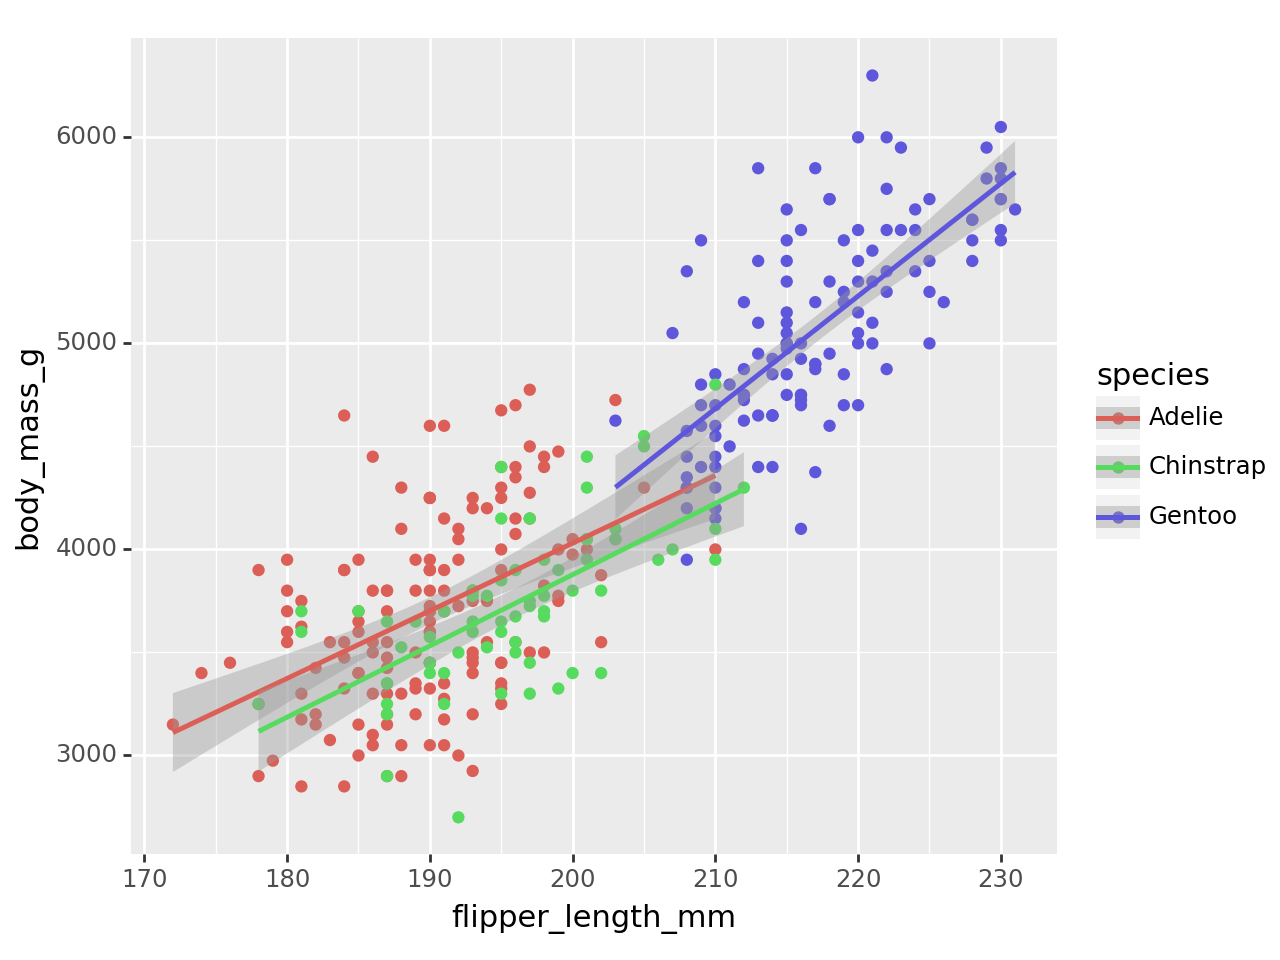

<Figure Size: (640 x 480)>

In [127]:
base_plot = (ggplot(
              data = penguins,
              mapping = aes(x = "flipper_length_mm", y = "body_mass_g", color = "species")) +
             geom_point()
            )
base_plot + geom_smooth(method = "lm")

## Global vs. Local aesthetics

- Global aesthetics: Aesthetic mappings defined in `ggplot()`.
  - Passed down to each of the subsequent geom layers.
- Local aestheitcs: Aesthetic mappings defined in a specific `geom()`
  - Only affect that specifices `geom()`

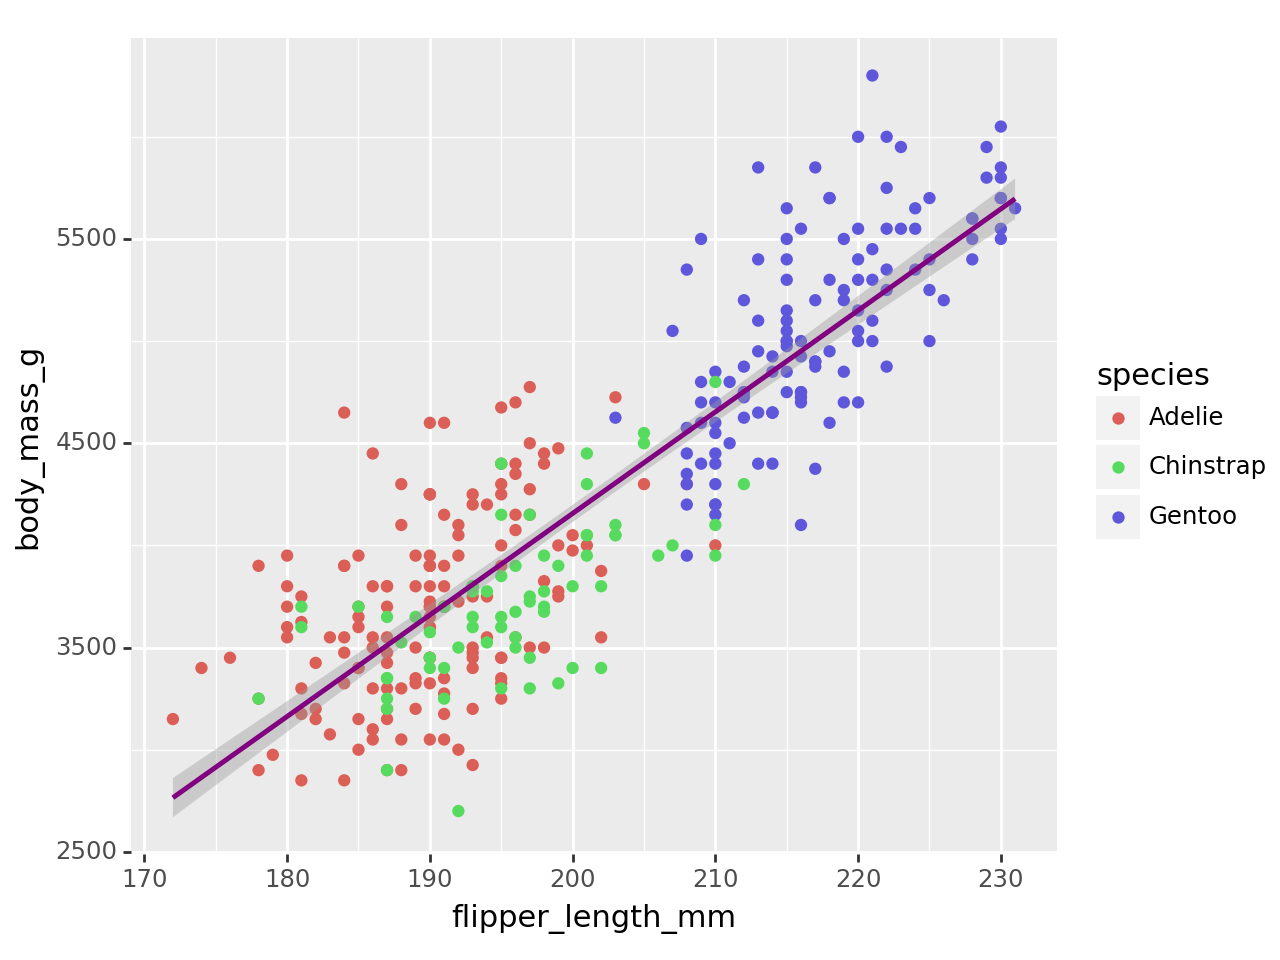

In [62]:
(
  ggplot(
      data = penguins,
      mapping = aes(x = "flipper_length_mm", y = "body_mass_g")
      ) +
  geom_point(aes(color = "species")) +           # local color
  geom_smooth(method = "lm", color = 'purple')   # local color
).draw()

- We can also set the shape of points based on `species`.

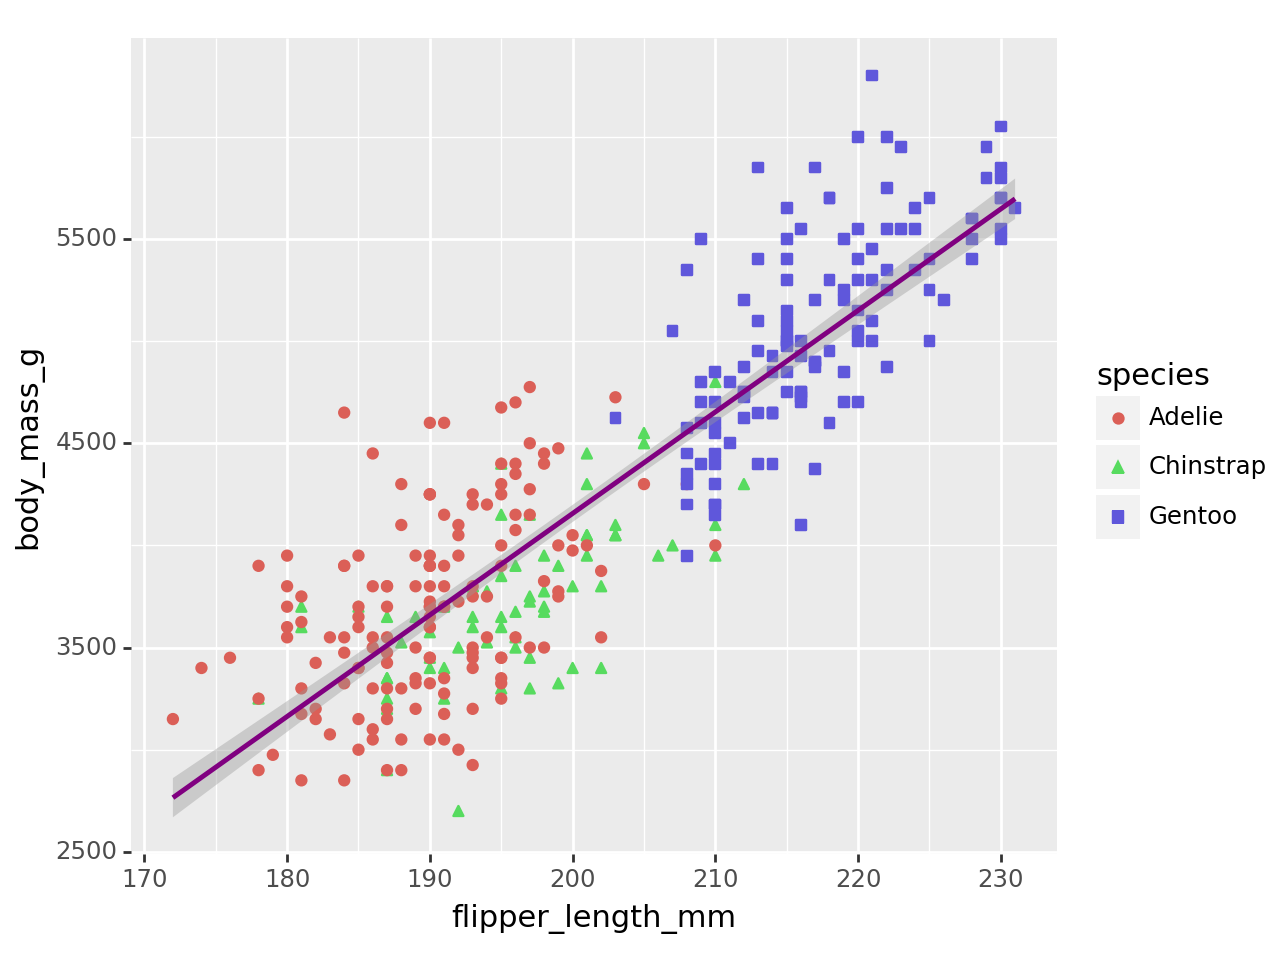

In [63]:
(
  ggplot(
      data = penguins,
      mapping = aes(x = "flipper_length_mm", y = "body_mass_g")
      ) +
  geom_point(aes(color = "species", shape="species")) +
  geom_smooth(method = "lm", color = 'purple')
).draw()

- Finally, let's add labels.
- `labs()`: to add labels.
  - Syntax: `labs(x = 'x_label', y='y_label', title='title' )`

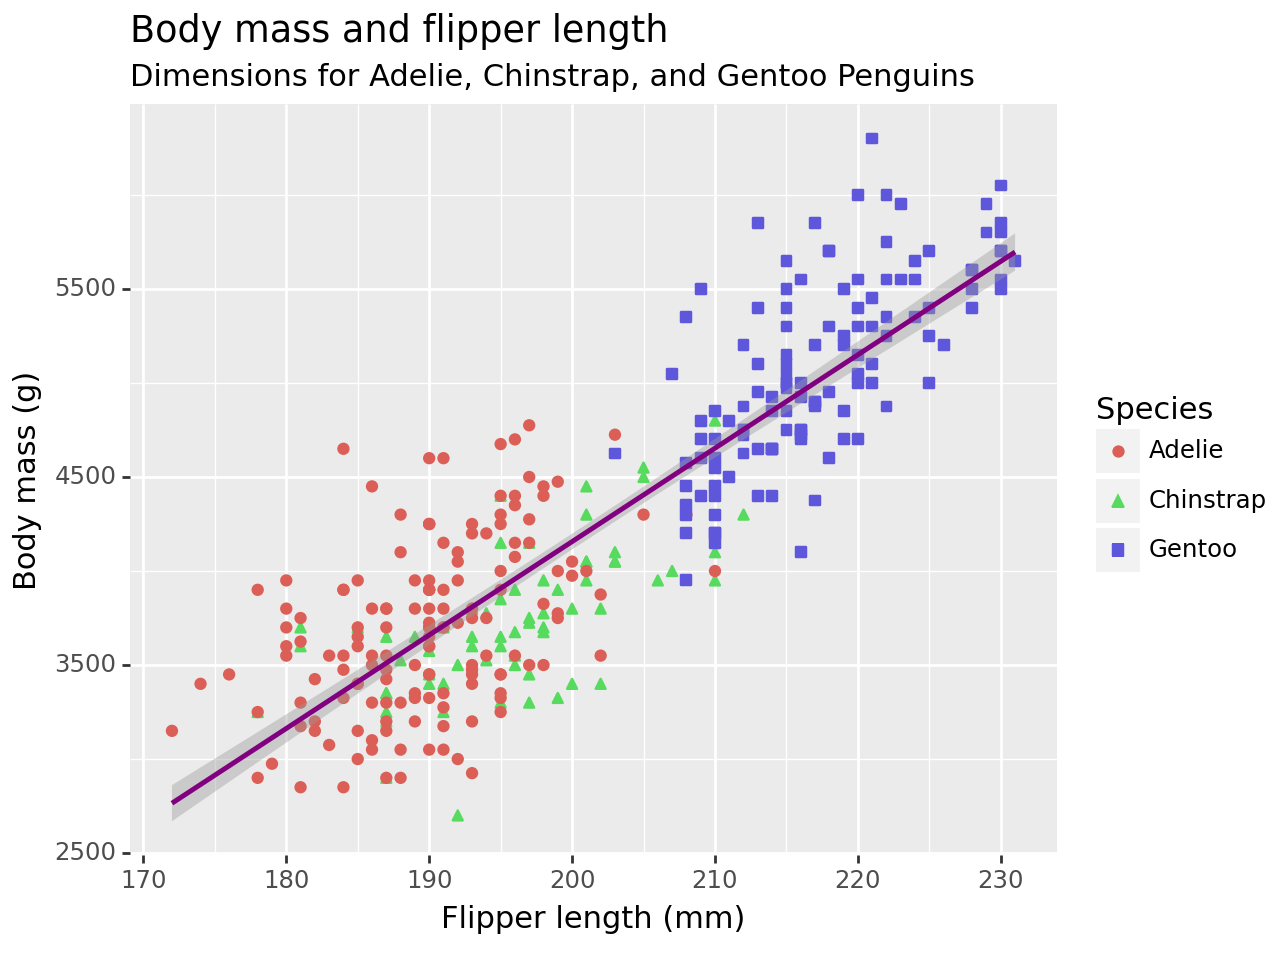

In [64]:
(
  ggplot(
      data = penguins,
      mapping = aes(x = "flipper_length_mm", y = "body_mass_g")
      ) +
  geom_point(aes(color = "species", shape="species")) +
  geom_smooth(method = "lm", color = 'purple') +
  labs(
    title = "Body mass and flipper length",
    subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",
    x = "Flipper length (mm)", y = "Body mass (g)",
    color = "Species", shape = "Species")
).draw()

# ---- Break Here ----

# All Kinds of Plots

## Plots depend on Variable Types

- [Google Slide for this part](https://docs.google.com/presentation/d/1so8zMlGj-m5c2qIv4-fEywcXMb9aFRBHAnaXGRWvRGg/edit?usp=sharing)

![data_science_life_cycle_visualization.png](https://drive.google.com/uc?export=view&id=14Ewqqdt-YDrjTb6rAeUQJSEWkFAJcoQ-)

## Variable Types

- ตัวแปรเชิงปริมาณ (Quantitative):

  - ตัวแปรต่อเนื่อง (Continuous)  = ตัวแปรที่มีค่าต่อเนื่องกันและสามารถวัดได้ละเอียดเท่าที่เครื่องมือวัดจะทำได้ เช่น ความสูง น้ำหนัก อุณหภูมิ เวลา
  - ตัวแปรไม่ต่อเนื่อง (Discrete) = ตัวแปรที่มีค่าเป็นจำนวนนับได้ มีช่วงห่างระหว่างค่า เช่น จำนวนลูกค้า จำนวนสินค้า อายุ (ปี)


- ตัวแปรเชิงคุณภาพ (Qualitative):

  - ตัวแปรเรียงลำดับได้ (Ordinal) = ตัวแปรที่มีค่าเป็นหมวดหมู่และสามารถจัดเรียงลำดับได้ แต่ระยะห่างระหว่างค่าอาจไม่เท่ากัน เช่น ระดับการศึกษา (ประถม มัธยม ปริญญาตรี) ระดับความพึงพอใจ (น้อย ปานกลาง มาก)
  - ตัวแปรนามบัญญัติ (Nominal) = ตัวแปรที่มีค่าเป็นหมวดหมู่แต่ไม่สามารถจัดเรียงลำดับได้ เช่น เพศ สีผม ศาสนา กลุ่มเลือด

### Variable Type Examples

### Distributions

- A distribution for a variable describe:
  - The set of values that a variable can possibly take.
  - The frequency with which each value occurs.
  - In other words: How is the variable distributed across all of its possible values?
  - Percentages should sum to 100% and counts should sum to the total.

## Barplot in ggplot
- Barplot is one option to plot distributions.
- Suitable when the number of values is small.
- Syntax: `geom_bar()`
  - By default, `geom_bar()` count the number of each category and draw a bar.

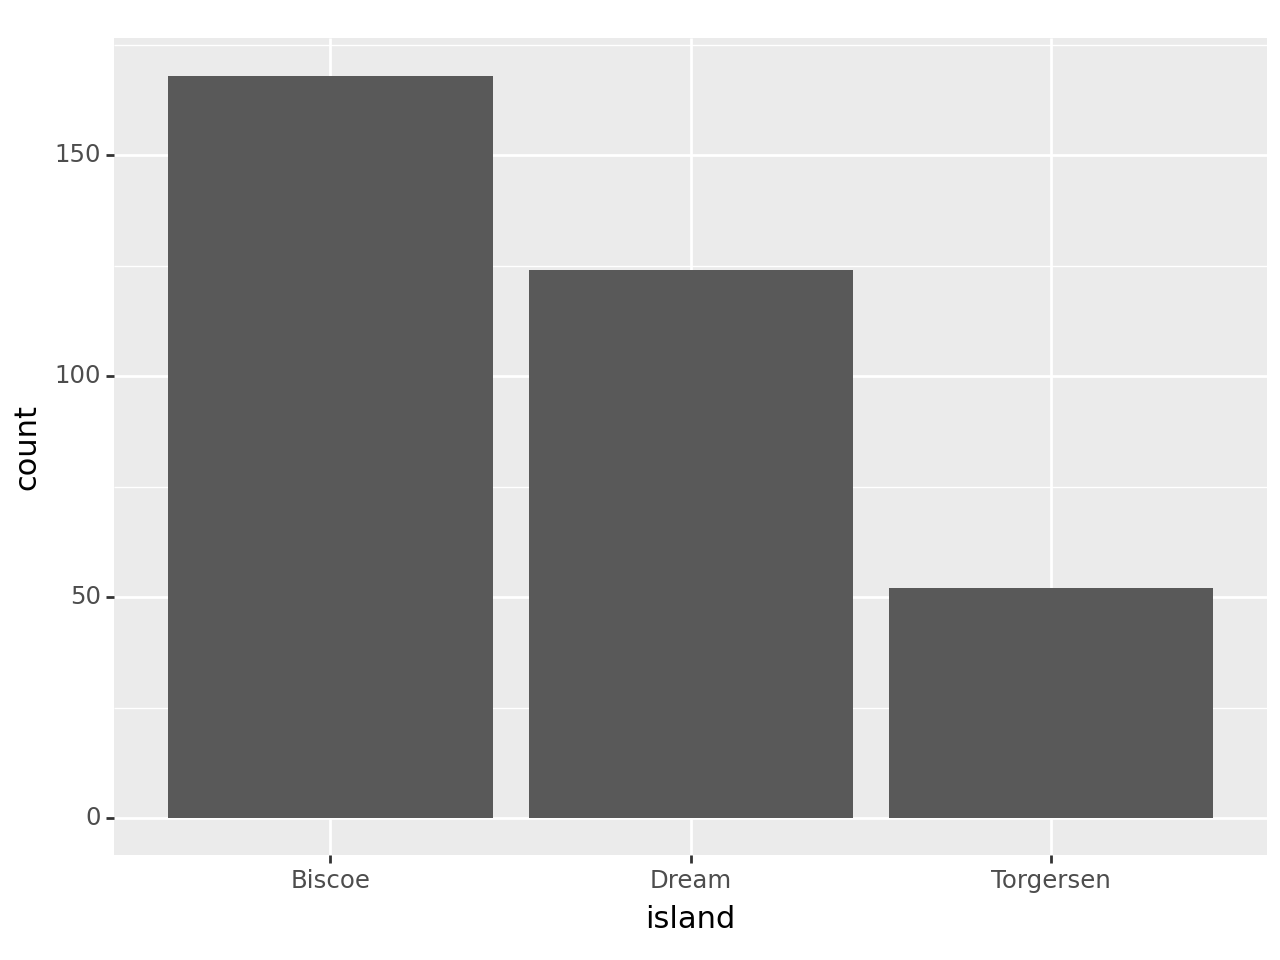

<Figure Size: (640 x 480)>

In [65]:
ggplot(data = penguins, mapping = aes(x = "island"))  + geom_bar()

- `color` argument will add border's color.
- `fill` argument will add fill's color.

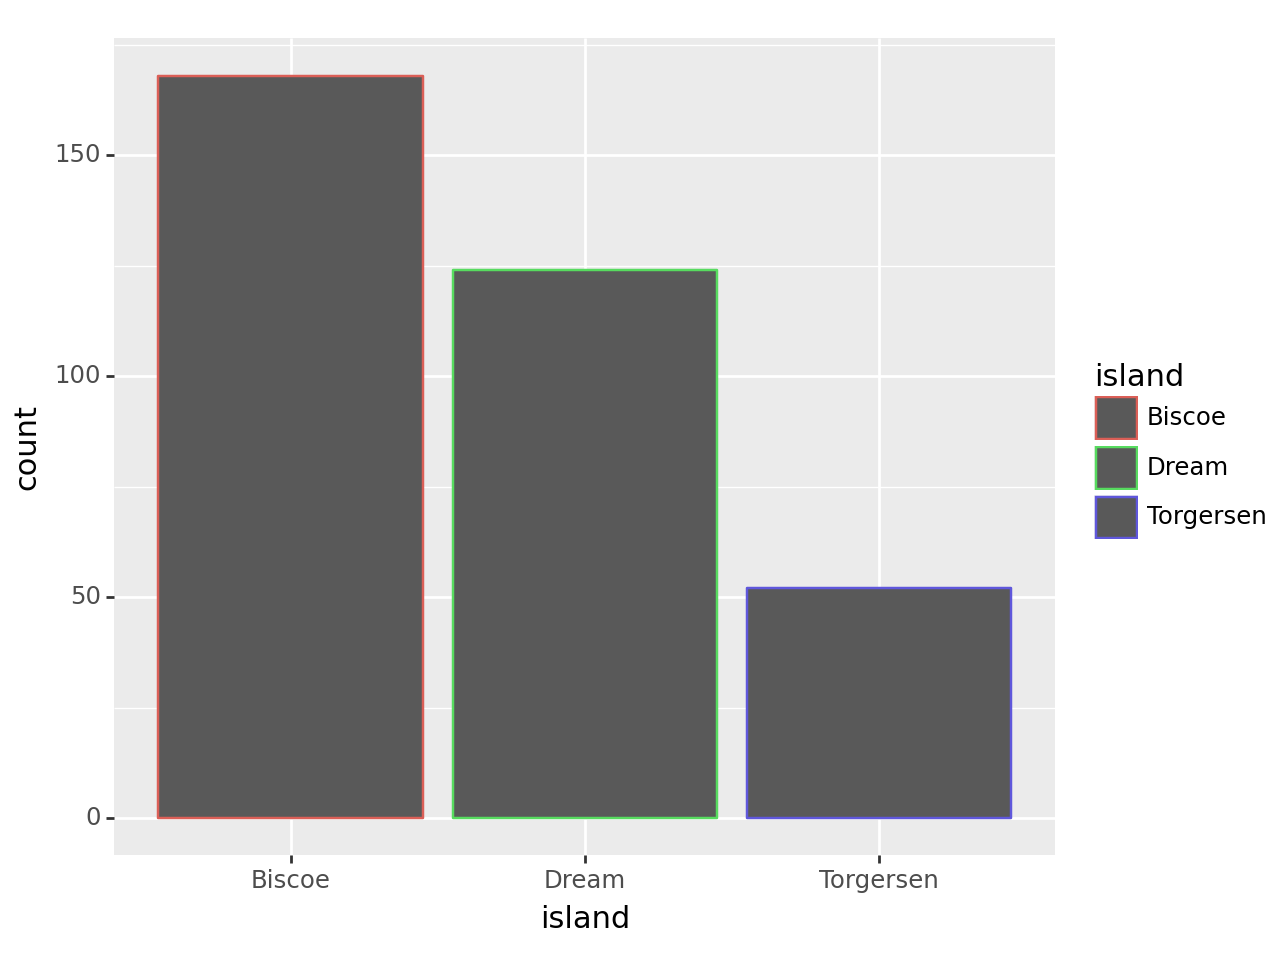

<Figure Size: (640 x 480)>

In [67]:
ggplot(data = penguins, mapping = aes(x = "island", color = "island"))  + geom_bar()

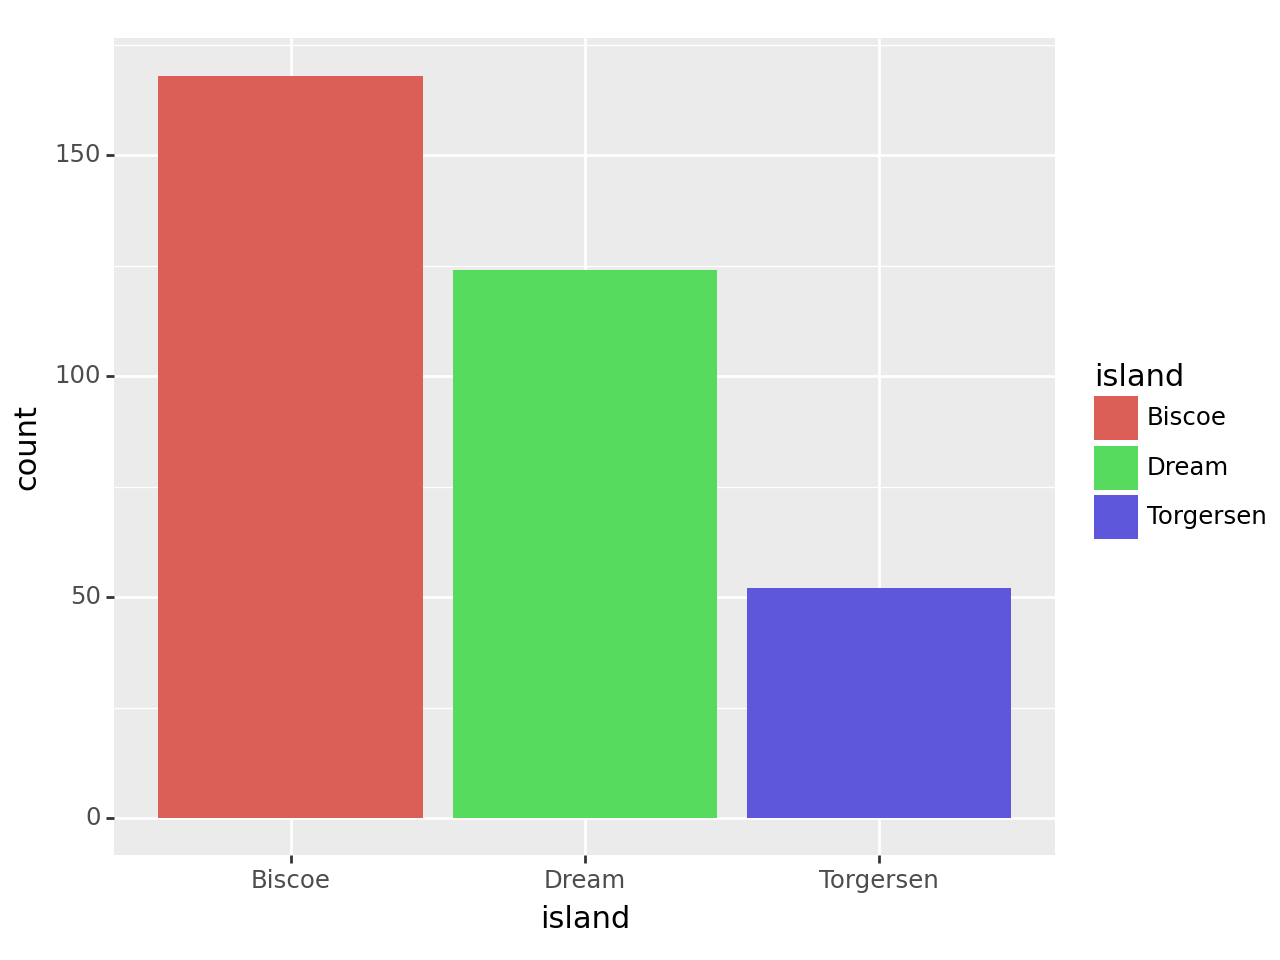

<Figure Size: (640 x 480)>

In [68]:
ggplot(data = penguins, mapping = aes(x = "island", fill = "island"))  + geom_bar()

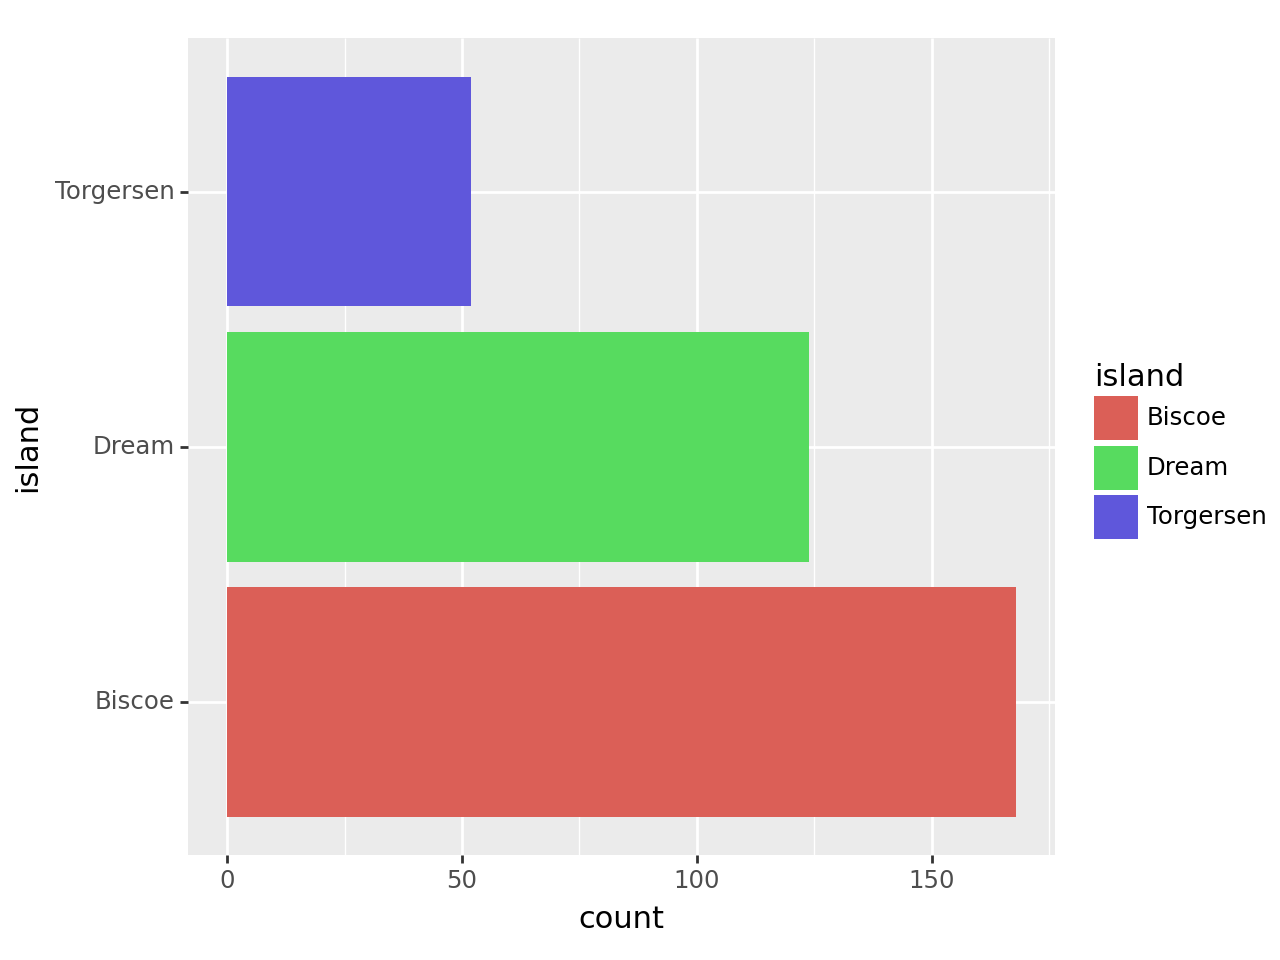

<Figure Size: (640 x 480)>

In [80]:
(
    ggplot(data = penguins, mapping = aes(x = "island", fill = "island"))  +
    geom_bar() +
    coord_flip()
)

- To flip the barplot, you need to add `+ coord_flip()`

### Histrograms

- Another way to plot a distribution.
- Collects datapoints with similar values into a shared "bin".
- Scales the bins such that the area of each bin is equal to the percentage of datapoints it contains
- Syntax: `geom_histogram()`
  - Only requires `x`.
  - `binwidth` (in the unit of `x`)
  - `bins` to set the number of bins.
  

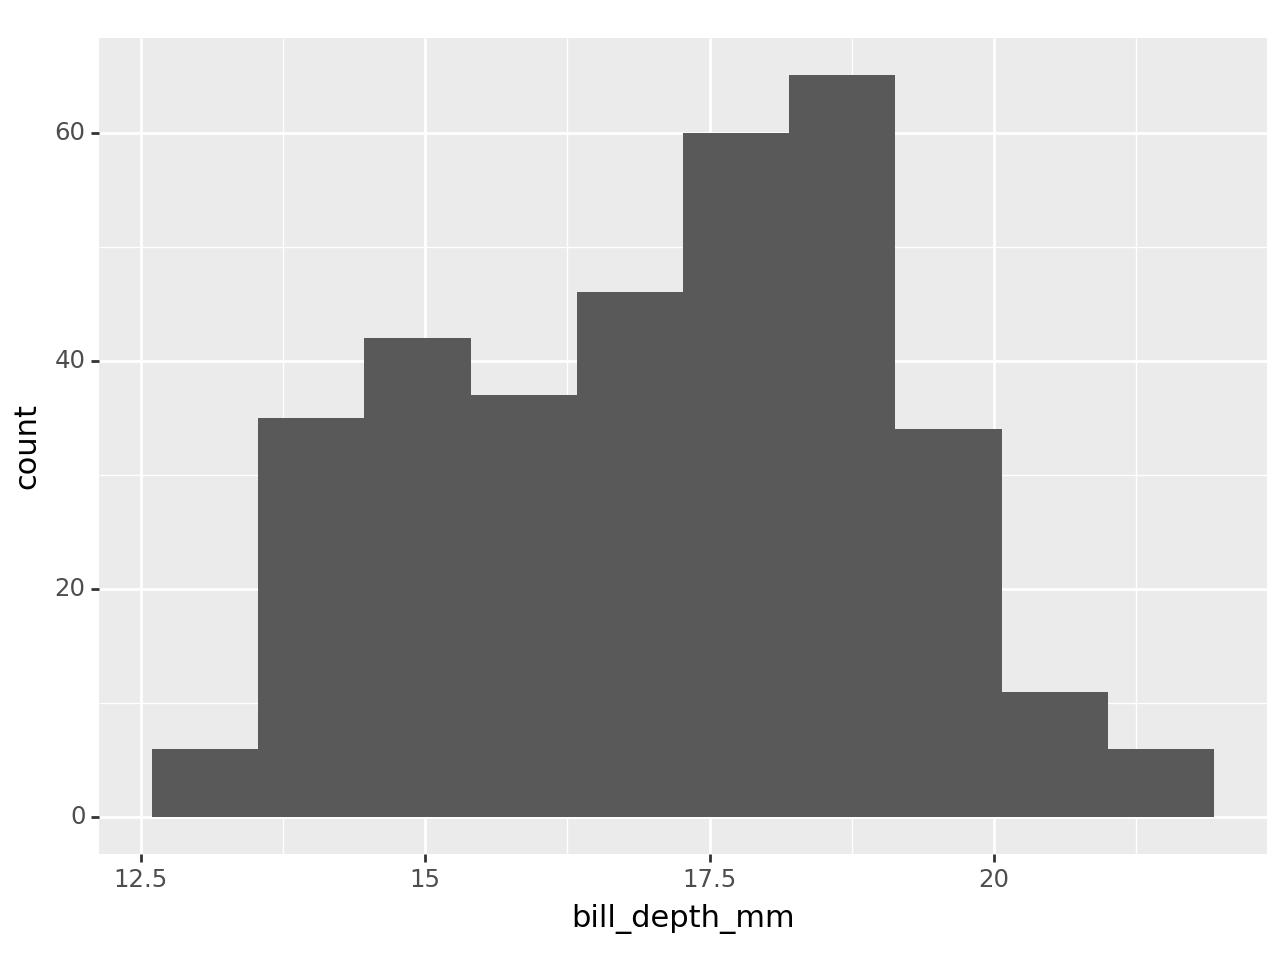

<Figure Size: (640 x 480)>

In [88]:
ggplot(data = penguins, mapping = aes(x = 'bill_depth_mm')) + geom_histogram()

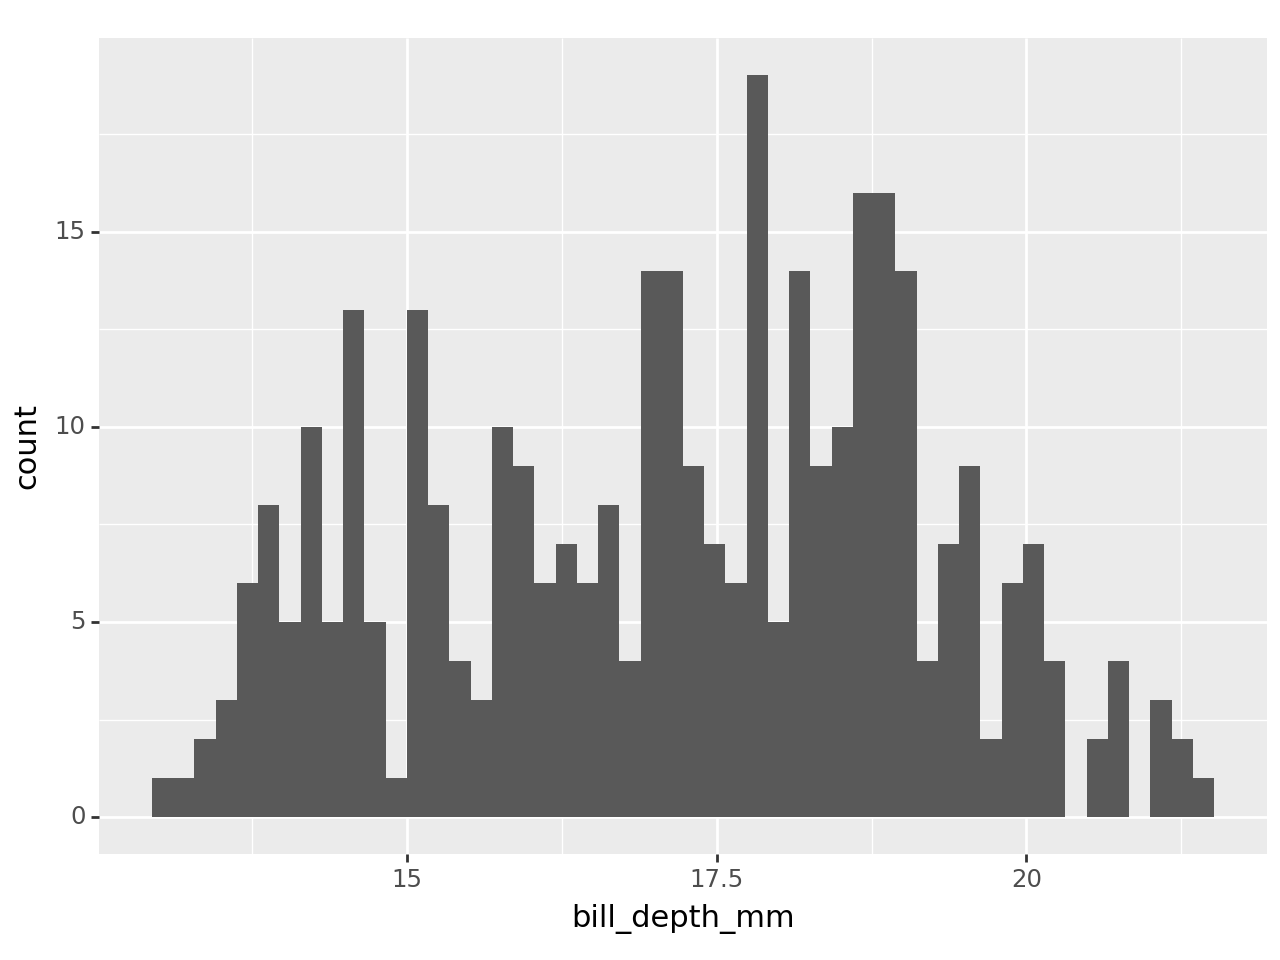

<Figure Size: (640 x 480)>

In [84]:
ggplot(data = penguins, mapping = aes(x = 'bill_depth_mm')) + geom_histogram(bins = 50)

### Density Plots
- `geom_density`: Create a smooth density
- Get the general trend of the distribution

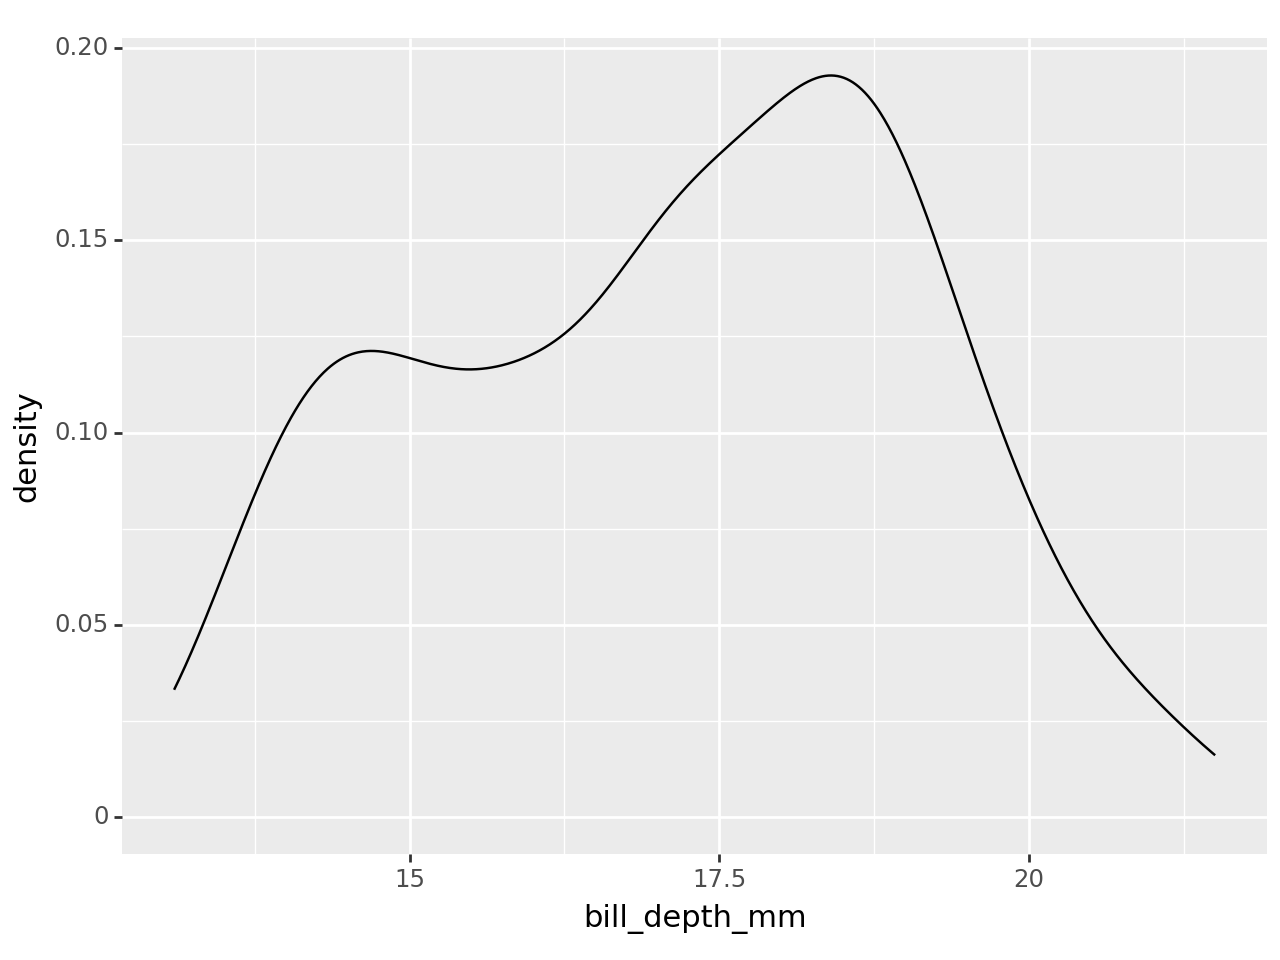

<Figure Size: (640 x 480)>

In [92]:
ggplot(data = penguins, mapping = aes(x = 'bill_depth_mm')) + geom_density()

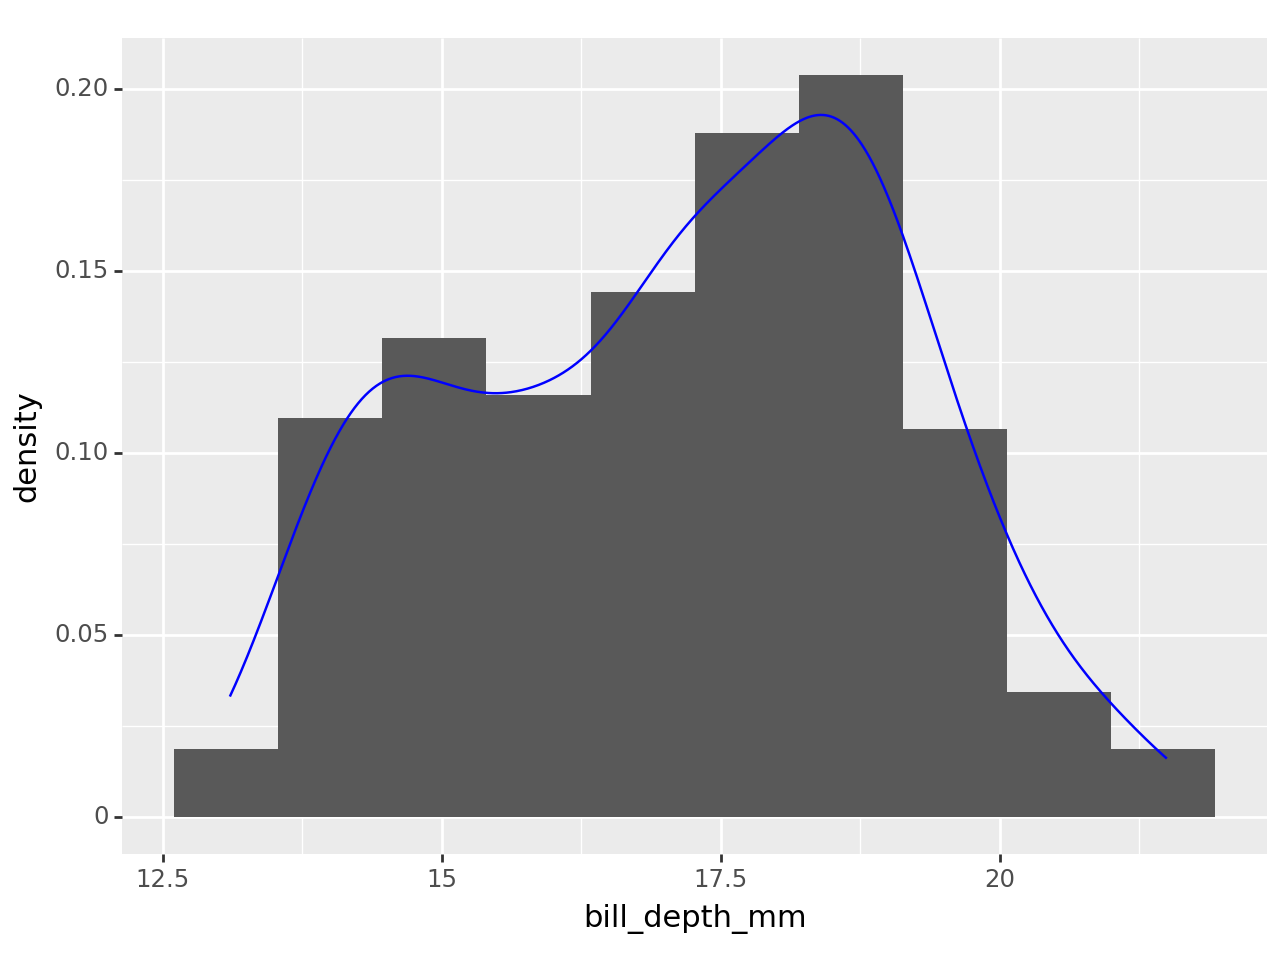

<Figure Size: (640 x 480)>

In [101]:
(
    ggplot(data = penguins, mapping = aes(x = 'bill_depth_mm')) +
    geom_histogram(aes(y=after_stat("density"))) +  #Need to convert count to density
    geom_density(color="blue")
)

### Boxplot
- Visualize the distribution of a continuous quantitative variable
- **Syntax**: `geom_boxplot()`
  - Need to set `y`
- Boxplot show three quartiles:
  - First or lower quartile: 25th percentile.
  - Second quartile: 50th percentile (median).
  - Third or upper quartile: 75th percentile.
- **Interquartile range (IQR)** measures spread.
  - IQR = third quartile - first quartile.

![data_science_life_cycle_visualization.png](https://drive.google.com/uc?export=view&id=1nKeH5itynv9SWCb_v6MpvLZjbDtvHz6i)

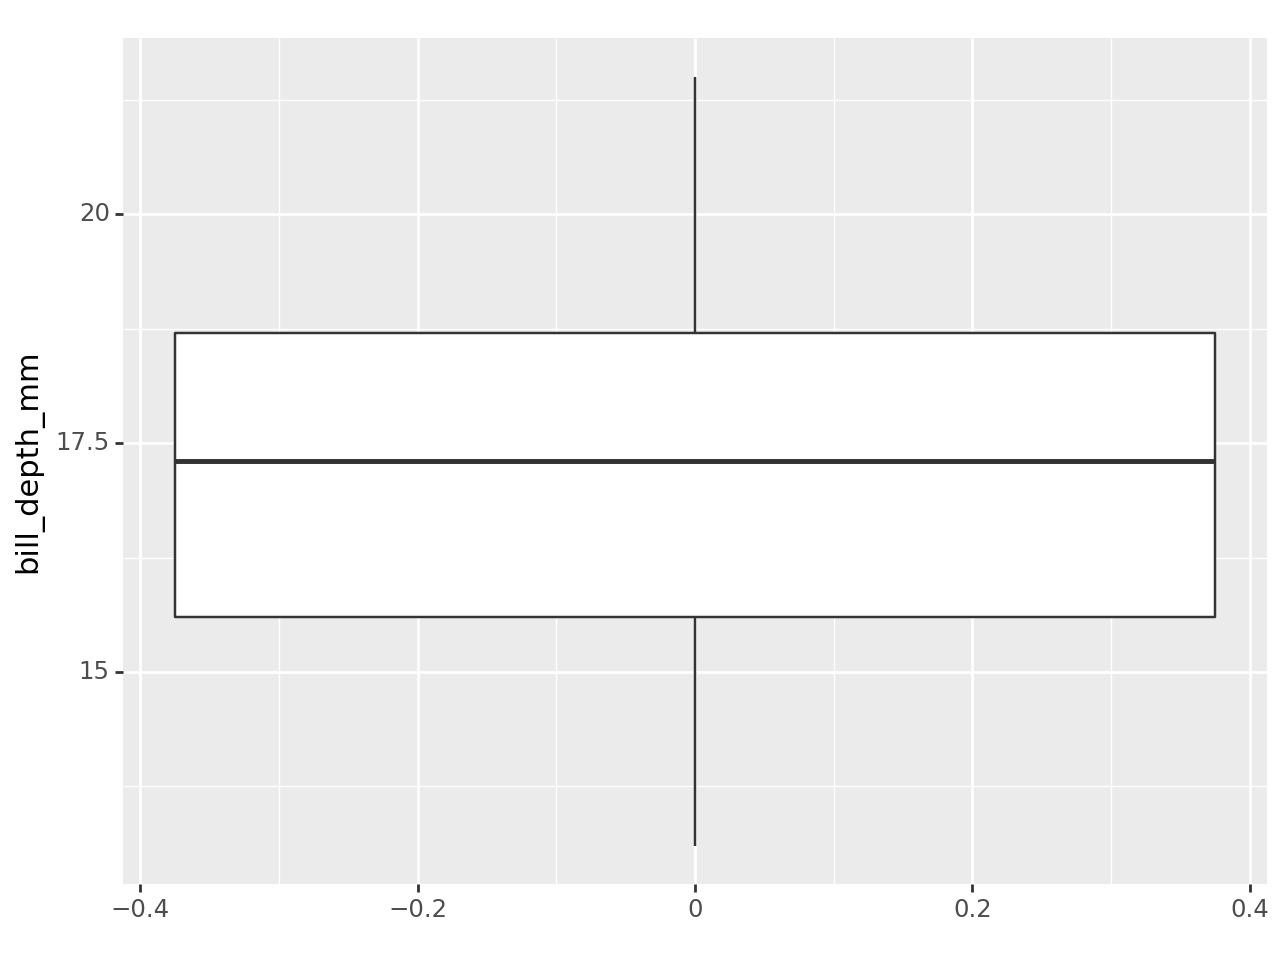

<Figure Size: (640 x 480)>

In [105]:
ggplot(data = penguins, mapping = aes(y = 'bill_depth_mm')) + geom_boxplot()

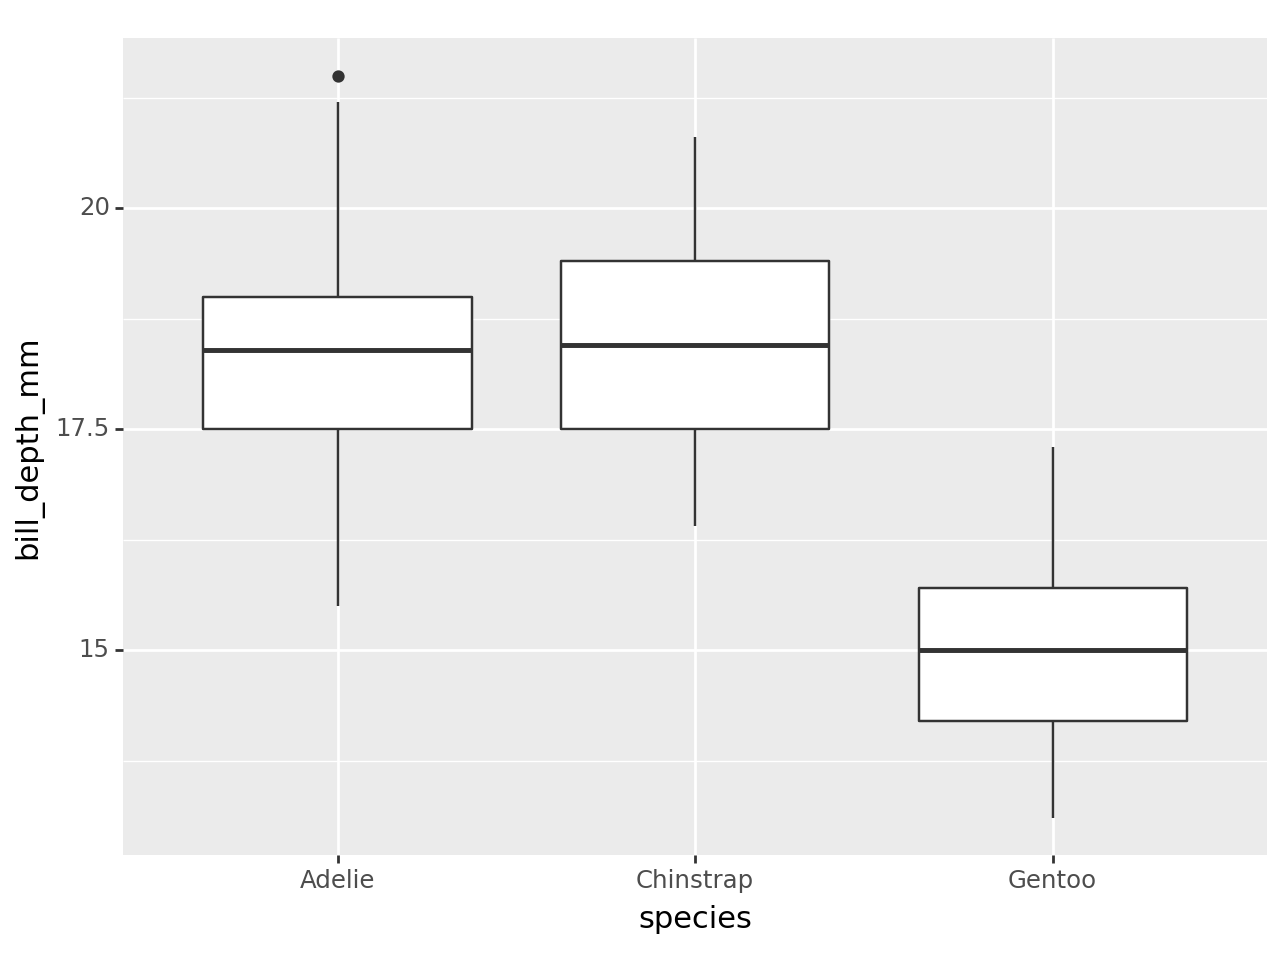

In [108]:
# species x bill_depth
(
    ggplot(data = penguins, mapping = aes(x = 'species', y = 'bill_depth_mm')) +
    geom_boxplot()
).draw()

### Violin plot
- In a box plot, the width of the box encodes no meaning.
- In a violin plot, the width of the "violin" indicates the density of datapoints at each value.

![data_science_life_cycle_visualization.png](https://drive.google.com/uc?export=view&id=1m54-rSD1ei0tt6CBxnOEYYlEzhkEfWuB)

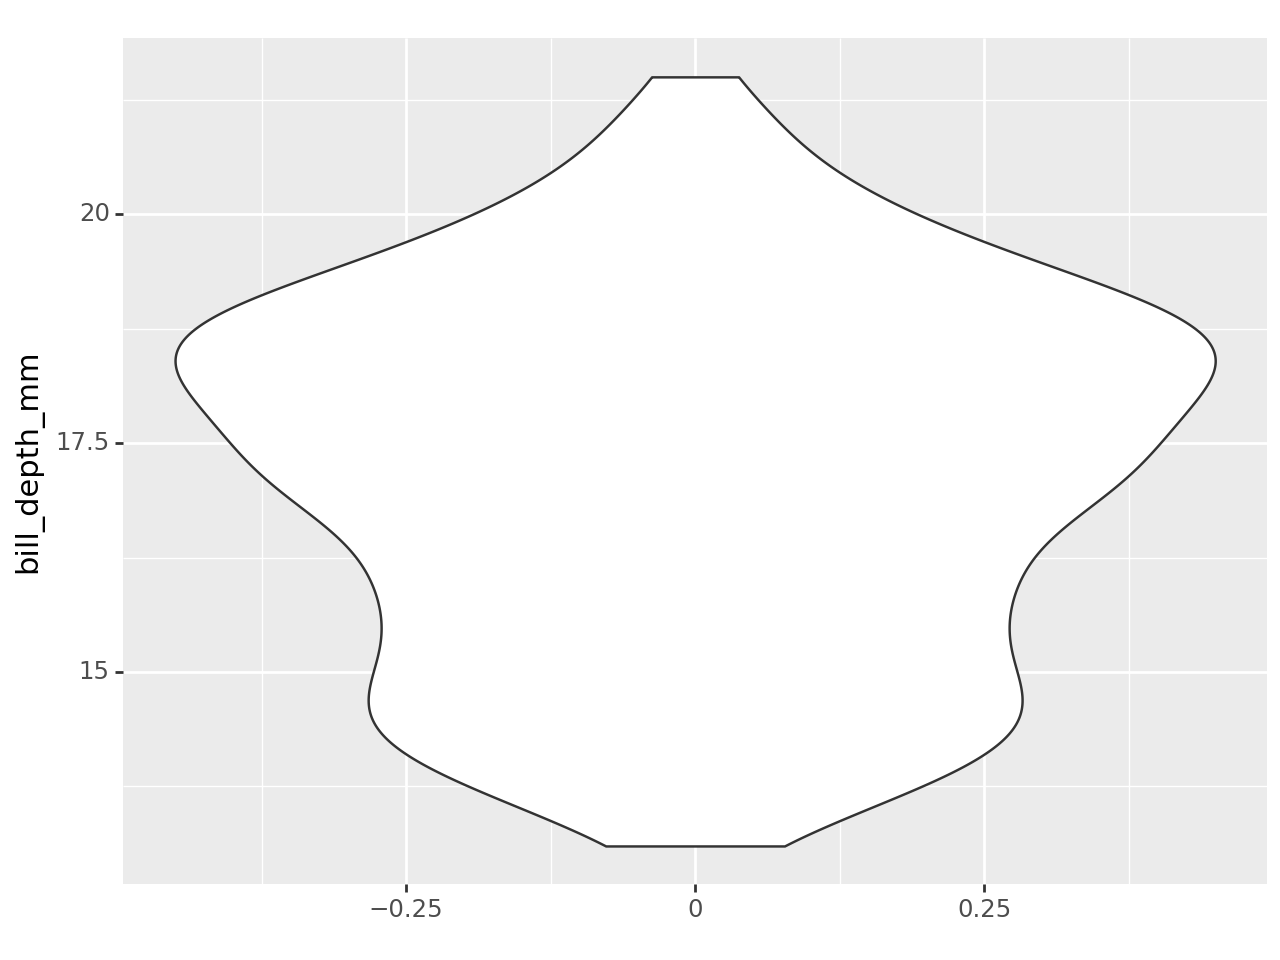

<Figure Size: (640 x 480)>

In [109]:
ggplot(data = penguins, mapping = aes(y = 'bill_depth_mm')) + geom_violin()

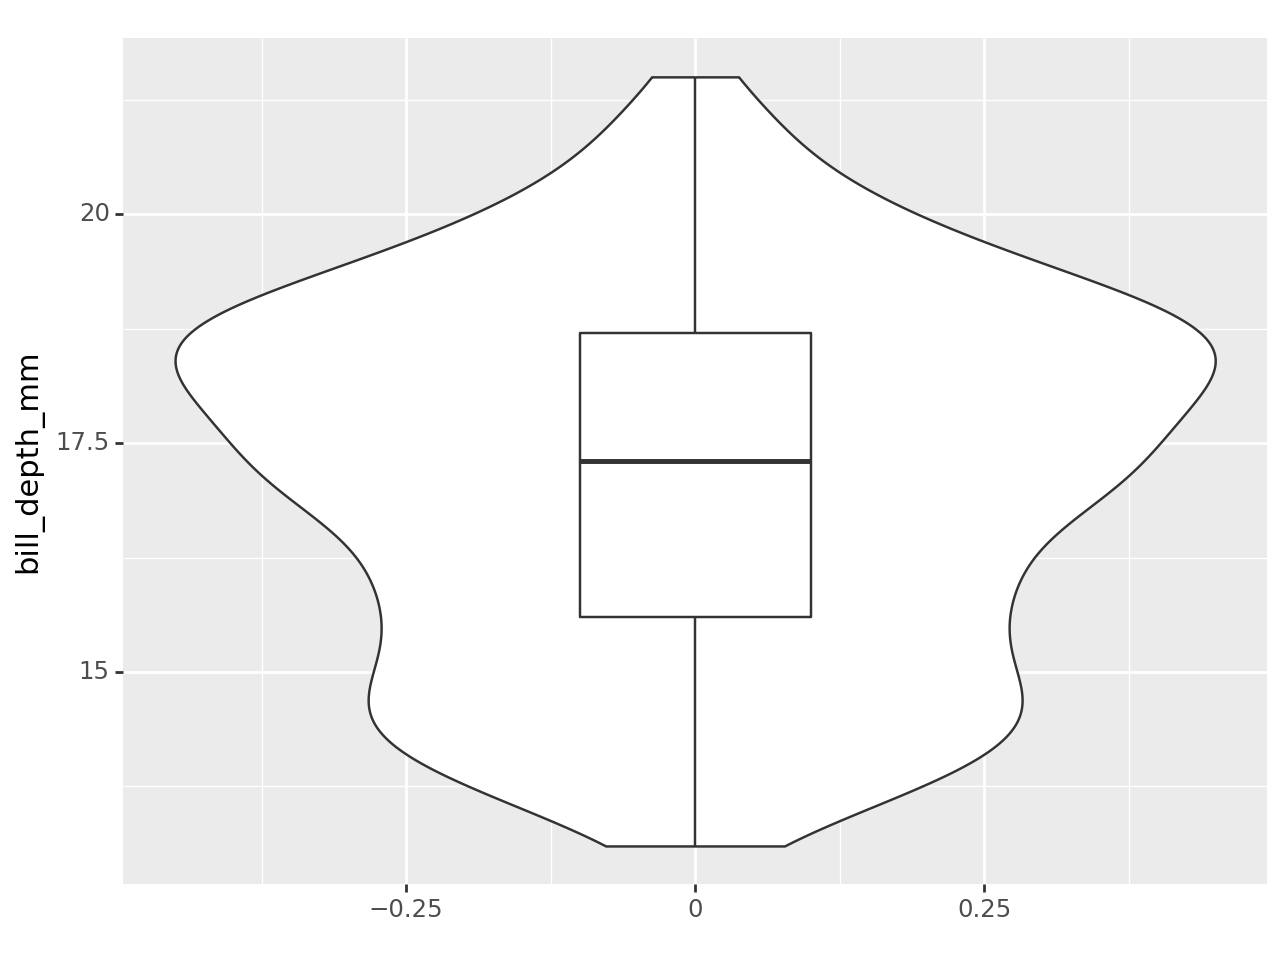

<Figure Size: (640 x 480)>

In [119]:
(
  ggplot(data = penguins, mapping = aes(y = 'bill_depth_mm')) +
  geom_violin() +
  geom_boxplot(width = 0.2)  # reduce the width of boxplot
)

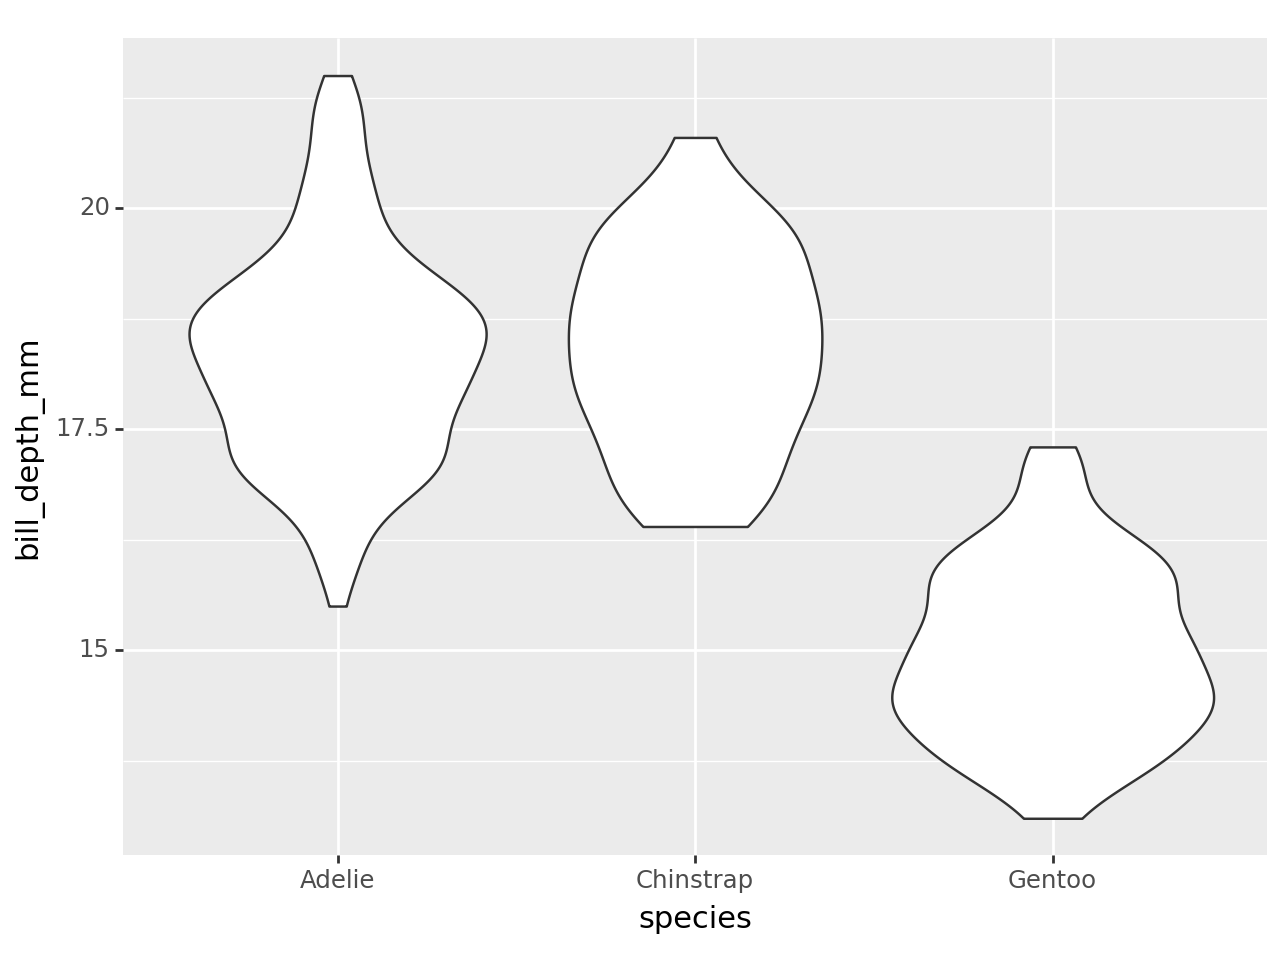

<Figure Size: (640 x 480)>

In [110]:
# species x bill_depth
(
    ggplot(data = penguins, mapping = aes(x = 'species', y = 'bill_depth_mm')) +
    geom_violin()
)

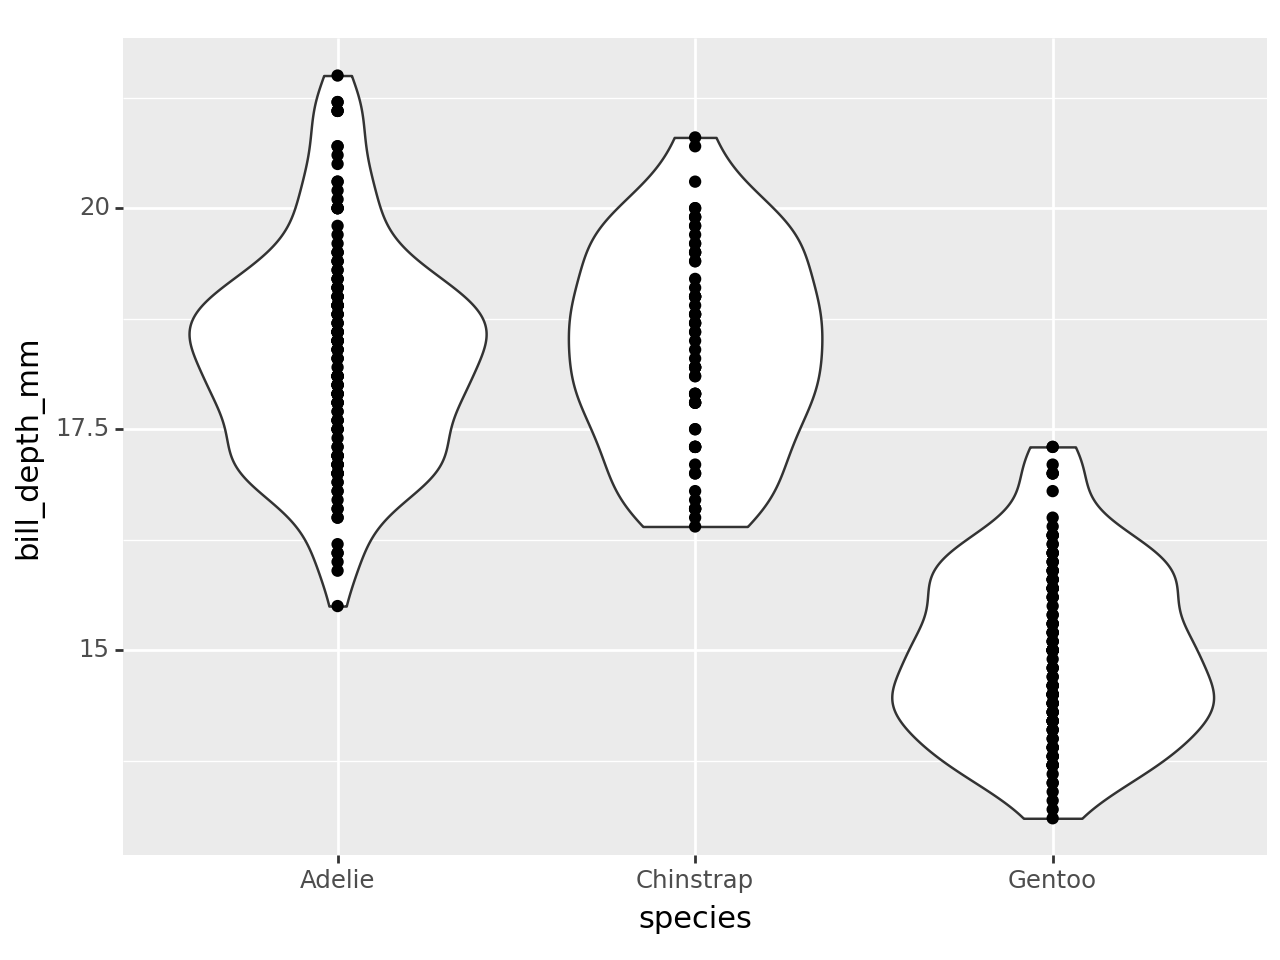

<Figure Size: (640 x 480)>

In [111]:
# Lay down points
(
    ggplot(data = penguins, mapping = aes(x = 'species', y = 'bill_depth_mm')) +
    geom_violin() +
    geom_point()
)

### jitter points
- `geom_jitter()`: plot jitted points
  - `width`: the width of jitter
  - `height`: the height of jitter

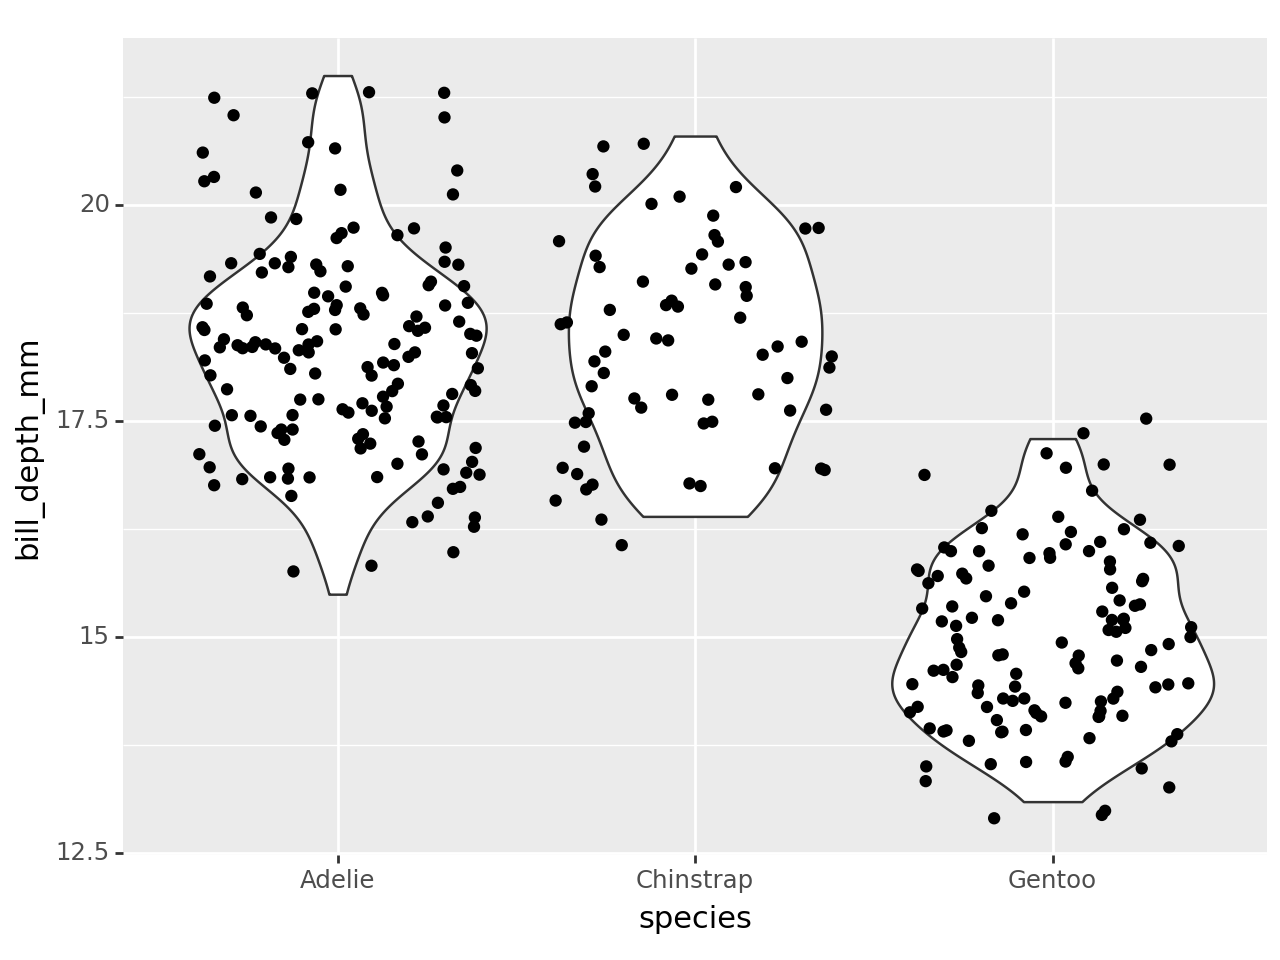

<Figure Size: (640 x 480)>

In [115]:
# Lay down points + jitter
(
    ggplot(data = penguins, mapping = aes(x = 'species', y = 'bill_depth_mm')) +
    geom_violin() +
    geom_jitter()         # can also be done with geom_point(position = 'jitter')
)

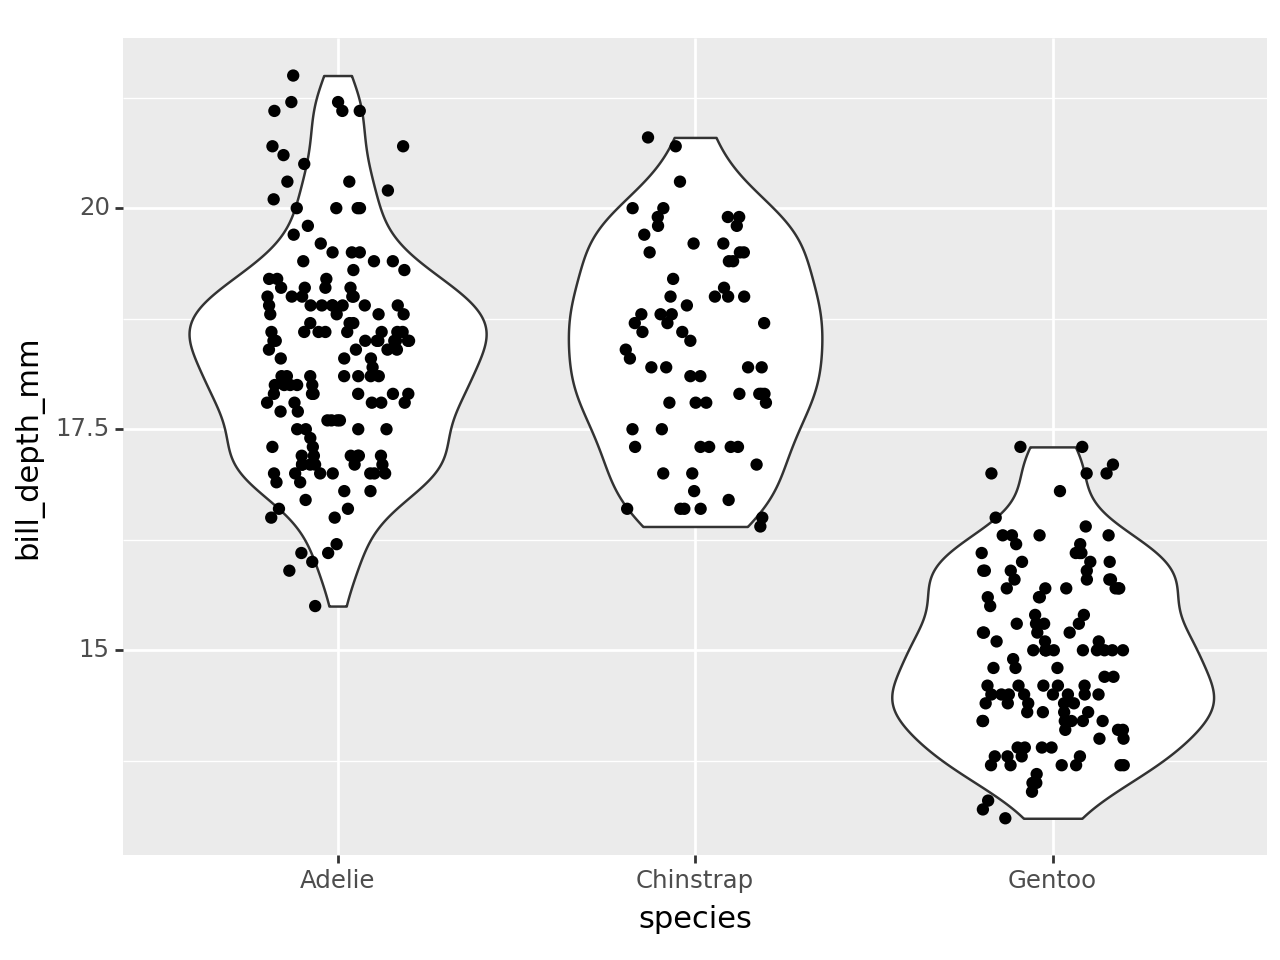

<Figure Size: (640 x 480)>

In [114]:
# Lay down points + jitter
(
    ggplot(data = penguins, mapping = aes(x = 'species', y = 'bill_depth_mm')) +
    geom_violin() +
    geom_jitter(height = 0, width = 0.2)
)

## Theme
- You can change the over theme of the plot
- Syntax: `theme_name()`
- Default is `theme_gray()`
  

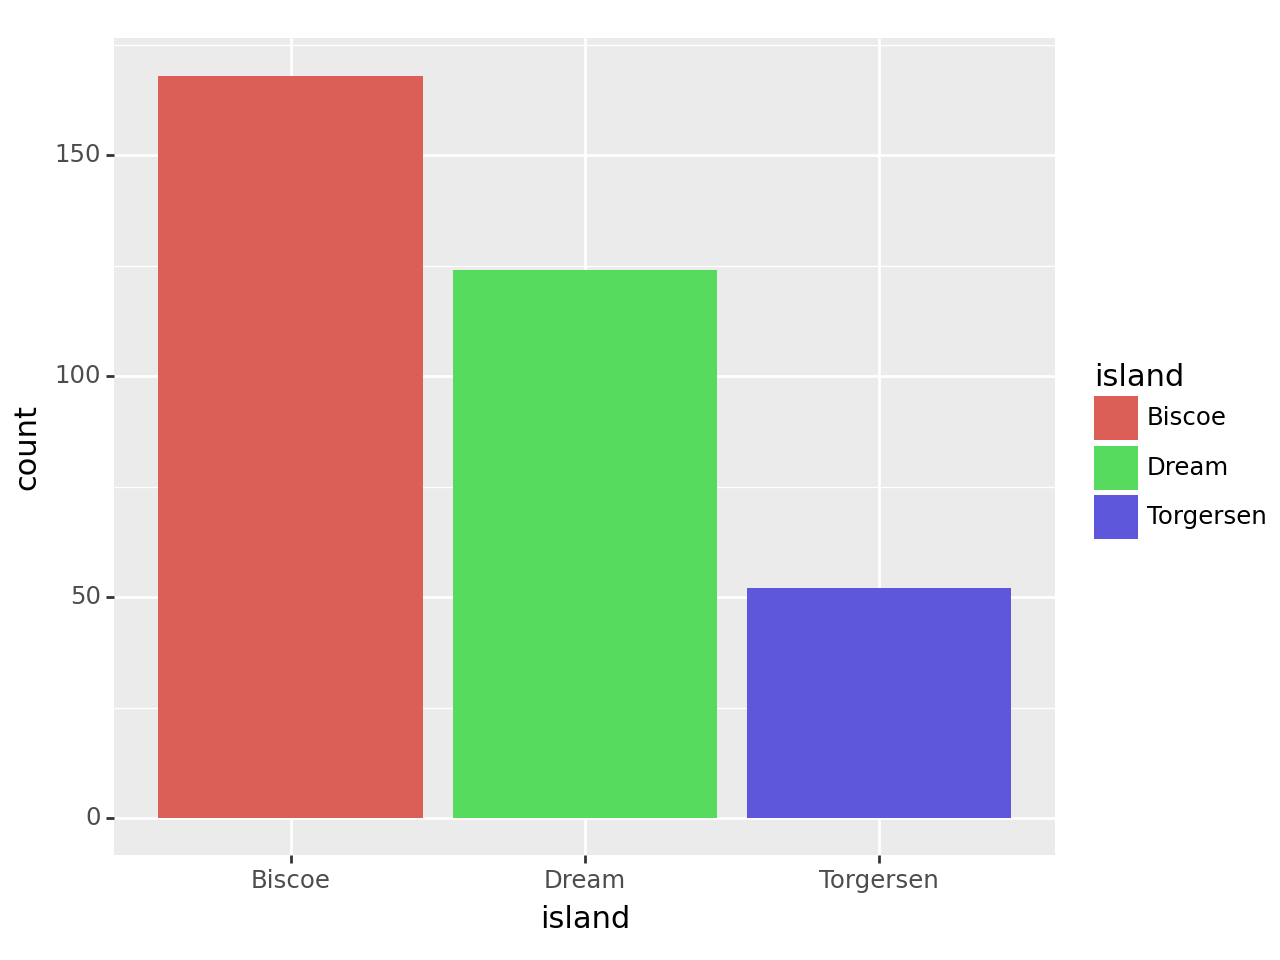

In [122]:
# Standard
island_bar = (ggplot(data = penguins, mapping = aes(x = "island", fill = "island"))  +
              geom_bar())
island_bar

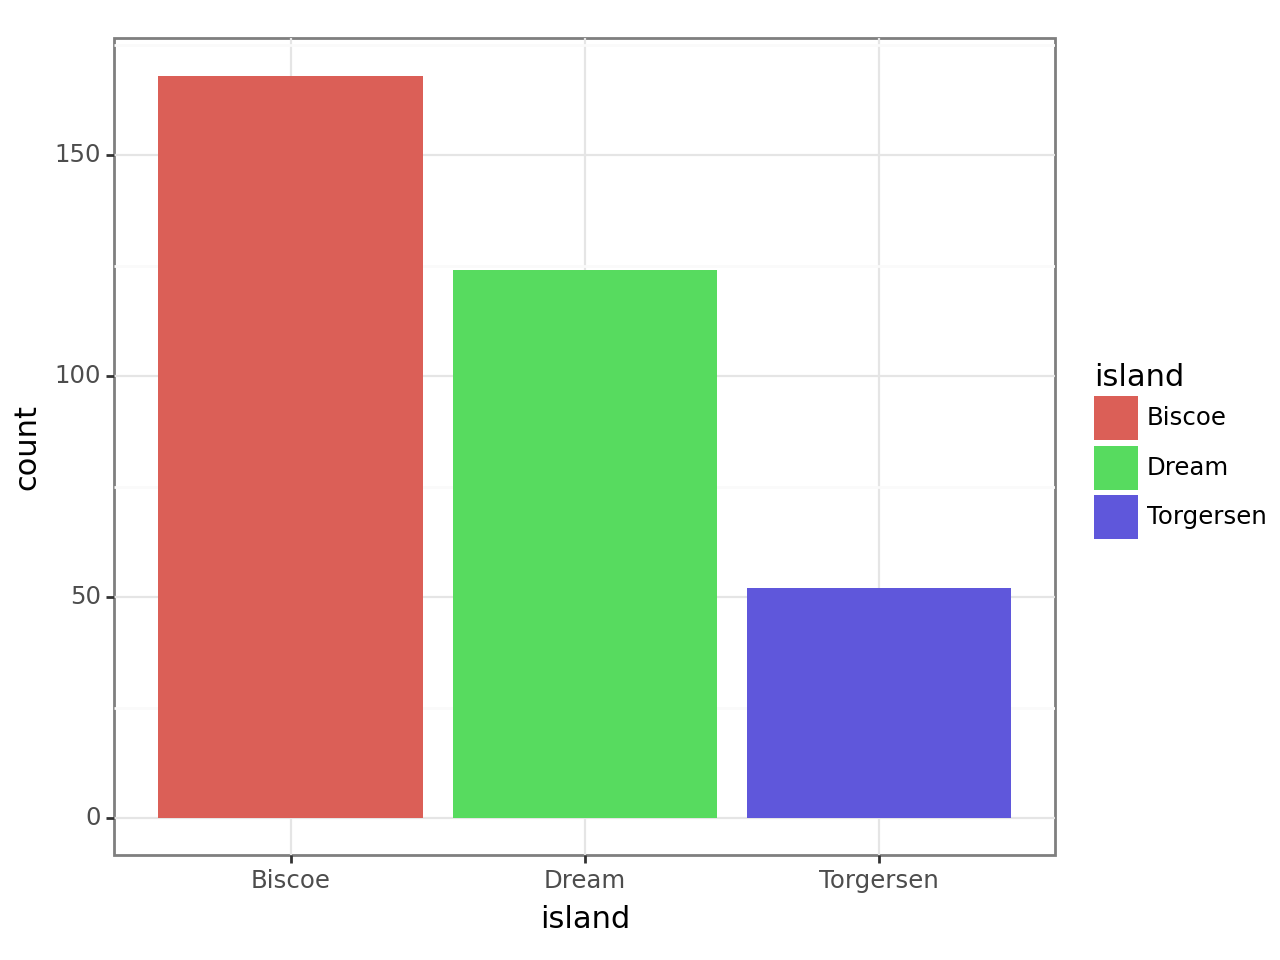

<Figure Size: (640 x 480)>

In [123]:
island_bar + theme_bw()

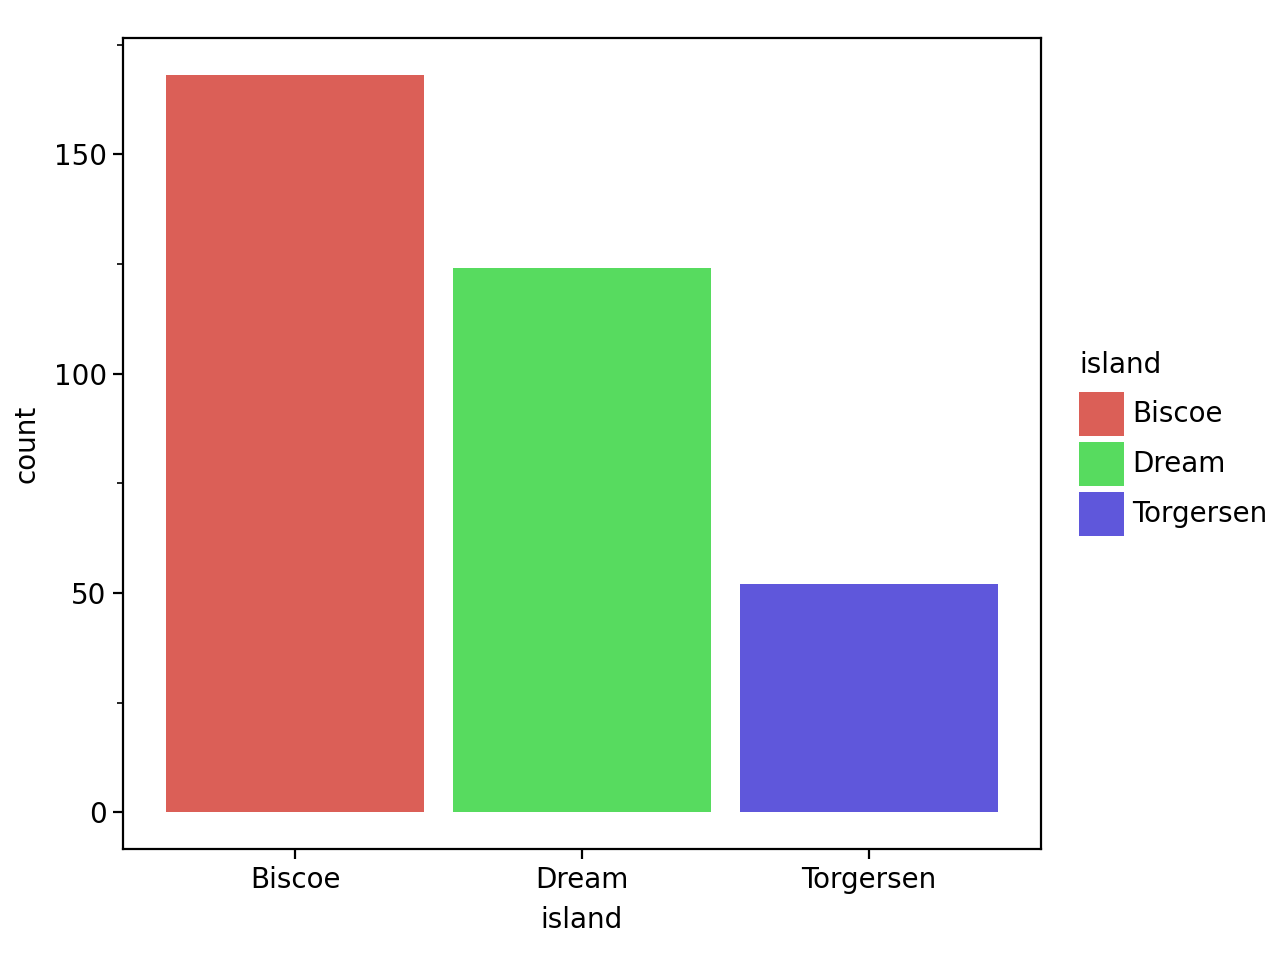

<Figure Size: (640 x 480)>

In [124]:
island_bar + theme_matplotlib()

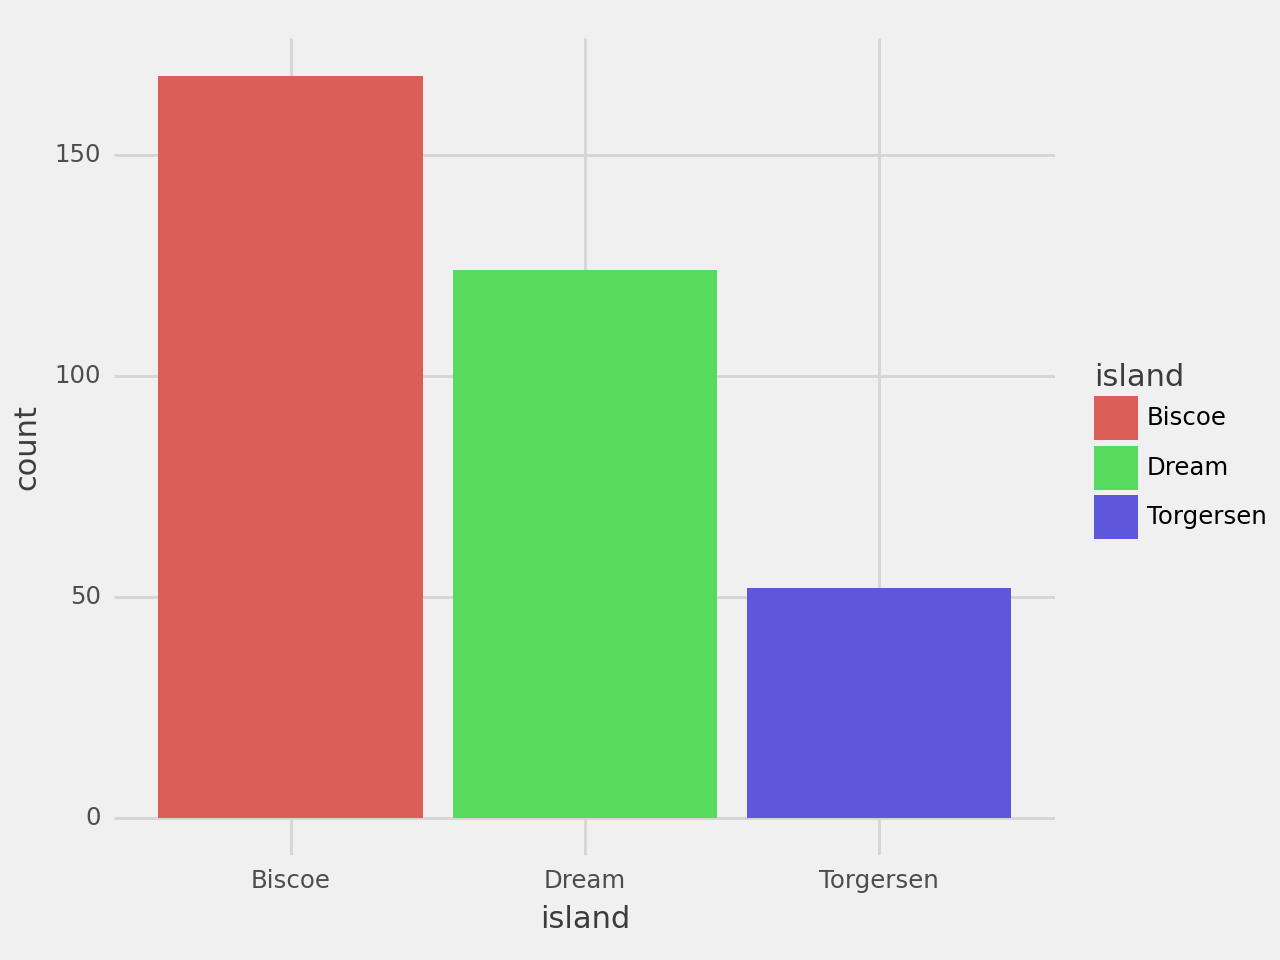

<Figure Size: (640 x 480)>

In [126]:
# FiveThirtyEight theme: https://projects.fivethirtyeight.com/polls/
island_bar + theme_538()

## ggplot cheatsheat
- https://rstudio.github.io/cheatsheets/data-visualization.pdf